# Теория к 4 уроку

# Курсовая работа

# Описание датасета 
**подпункты с описанием добавленных столбцов после подготовки**


* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
        
        1. Annual Income upd.2 - пропуски заполены мединой
        
* **Years in current job** - количество лет на текущем месте работы

        1. upd2 - замененные на числовые значения и заполненные модой
        2. дамми переменные заполненные модой
        
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
        
        1. upd.2 - пропуски заполены модой
        
* **Purpose** - цель кредита
        
        1. разложен на дамми переменные
  
* **Term** - срок кредита
        
        1. разложен на дамми переменные
  
* **Current Loan Amount** - текущая сумма кредита
        
        1. ver.2 - выбросы заполены регрессией
        
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)
* **Credit Score** - кредитные очки
        
        1. ver.2 - убраны выбросы и заполнены пропуски с помощью модели
        2. ver.3 - убраны выбросы и заполнены пропуски медианой

## Загрузка данных

In [729]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import pickle
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')

In [730]:
PATH_COURSE_PROJECT_DATASET_TRAIN = 'course_project/course_project_train.csv'
PATH_COURSE_PROJECT_DATASET_TEST = 'course_project/course_project_test.csv'

PATH_COURSE_PROJECT_DATASET_TRAIN_5943 = 'course_project/course_project_train_5943.csv'
PATH_COURSE_PROJECT_DATASET_TEST_5943 = 'course_project/course_project_test_5943.csv'

PATH_COURSE_PROJECT_DATASET_TRAIN_PREP = 'course_project/course_project_train_prep.csv'
PATH_COURSE_PROJECT_DATASET_TEST_PREP = 'course_project/course_project_test_prep.csv'

PATH_COURSE_PROJECT_DATASET_TRAIN_5943_PREP = 'course_project/course_project_train_prep_5943.csv'
PATH_COURSE_PROJECT_DATASET_TEST_5943_PREP = 'course_project/course_project_test_prep_5943.csv'

SCALER_FILE_PATH = 'scaler.pkl'

In [731]:
df = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TRAIN)
df_test = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TEST)

# Визуальный осмотр данных

In [732]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [734]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

### Изменим строковый тип данных в 'Years in current job' и заменим его на числовой

In [735]:
for dataset in [df, df_test]:
    dataset['Years in current job empty'] = dataset['Years in current job']
    for i in dataset['Years in current job'].value_counts().index.to_list():    
        if i[:2] == '10':
            dataset.loc[dataset['Years in current job'] == i, 'Years in current job'] = 10
        elif i[0] == '<':
            dataset.loc[dataset['Years in current job'] == i, 'Years in current job'] = 0
        else:
            dataset.loc[dataset['Years in current job'] == i, 'Years in current job'] = i[0]
    
    dataset['Years in current job'] = dataset['Years in current job'].fillna(100)
    dataset['Years in current job'] = dataset['Years in current job'].astype('int64')
    dataset['Years in current job'].loc[dataset['Years in current job'] == 100] = None

## Осмотр числовых данных

In [736]:
df.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,5.880348,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,3.620092,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## Уникальные и пропущенные данные

In [737]:
def show_nans(df):
    for col in df.columns:
        print(col,': Uni:',len(df[col].unique()),', NaN: ',df[col].isna().sum())

In [738]:
show_nans(df)

Home Ownership : Uni: 4 , NaN:  0
Annual Income : Uni: 5479 , NaN:  1557
Years in current job : Uni: 12 , NaN:  371
Tax Liens : Uni: 8 , NaN:  0
Number of Open Accounts : Uni: 39 , NaN:  0
Years of Credit History : Uni: 408 , NaN:  0
Maximum Open Credit : Uni: 6963 , NaN:  0
Number of Credit Problems : Uni: 8 , NaN:  0
Months since last delinquent : Uni: 90 , NaN:  4081
Bankruptcies : Uni: 6 , NaN:  14
Purpose : Uni: 15 , NaN:  0
Term : Uni: 2 , NaN:  0
Current Loan Amount : Uni: 5386 , NaN:  0
Current Credit Balance : Uni: 6592 , NaN:  0
Monthly Debt : Uni: 6716 , NaN:  0
Credit Score : Uni: 269 , NaN:  1557
Credit Default : Uni: 2 , NaN:  0
Years in current job empty : Uni: 12 , NaN:  371


In [739]:
show_nans(df_test)

Home Ownership : Uni: 4 , NaN:  0
Annual Income : Uni: 1930 , NaN:  513
Years in current job : Uni: 12 , NaN:  86
Tax Liens : Uni: 8 , NaN:  0
Number of Open Accounts : Uni: 35 , NaN:  0
Years of Credit History : Uni: 345 , NaN:  0
Maximum Open Credit : Uni: 2435 , NaN:  0
Number of Credit Problems : Uni: 8 , NaN:  0
Months since last delinquent : Uni: 84 , NaN:  1358
Bankruptcies : Uni: 7 , NaN:  3
Purpose : Uni: 14 , NaN:  0
Term : Uni: 2 , NaN:  0
Current Loan Amount : Uni: 2026 , NaN:  0
Current Credit Balance : Uni: 2385 , NaN:  0
Monthly Debt : Uni: 2416 , NaN:  0
Credit Score : Uni: 212 , NaN:  513
Years in current job empty : Uni: 12 , NaN:  86


# Оценка целевой переменной

In [740]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

целевая переменная сильно разбалонсирована

In [741]:
def plot_outliers(df_train, df_test, col_name, hist = False):
    fig, ax = plt.subplots(1,3,figsize=(16,5))
    #ax[0].set_title(f'KDE for both datasets on {col_name}')
    ax[1].set_title('Train Dataset')
    ax[2].set_title('Test Dataset')
    sns.distplot(df_train[col_name], color='b', ax=ax[0], hist=hist, label='Train')
    sns.distplot(df_test[col_name], color='r', ax=ax[0], hist=hist, label='Test')
    sns.boxplot(df_train[col_name], ax=ax[1])
    sns.boxplot(df_test[col_name], color='r', ax=ax[2])
    plt.show()

In [742]:
cont_cols = df.select_dtypes(include=['float']).columns.tolist()
cont_cols.remove('Months since last delinquent')

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

TARGET = ['Credit Default']

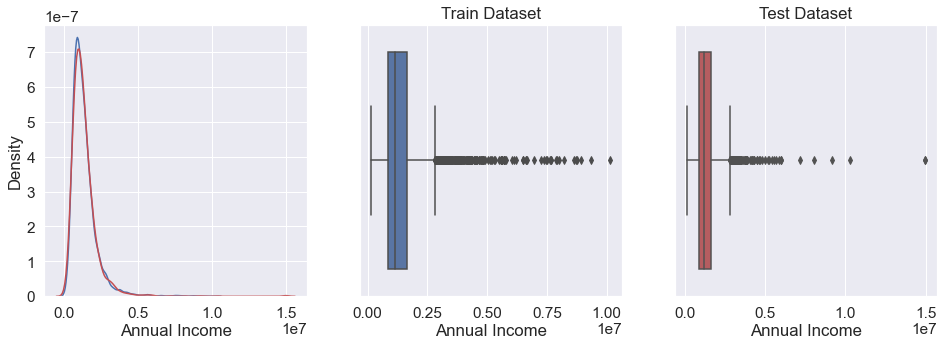

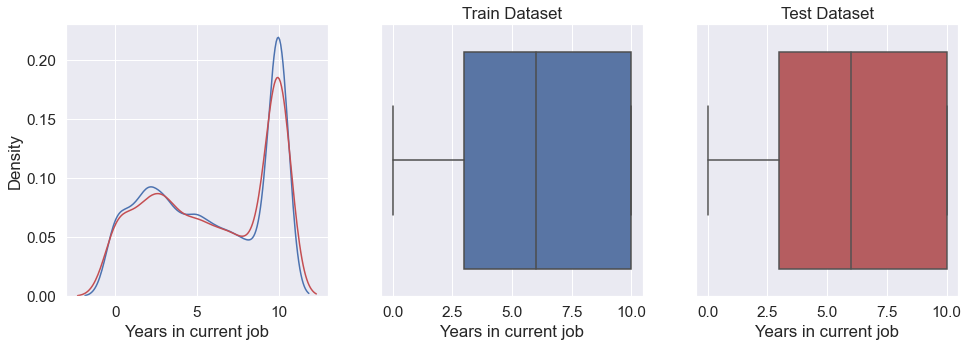

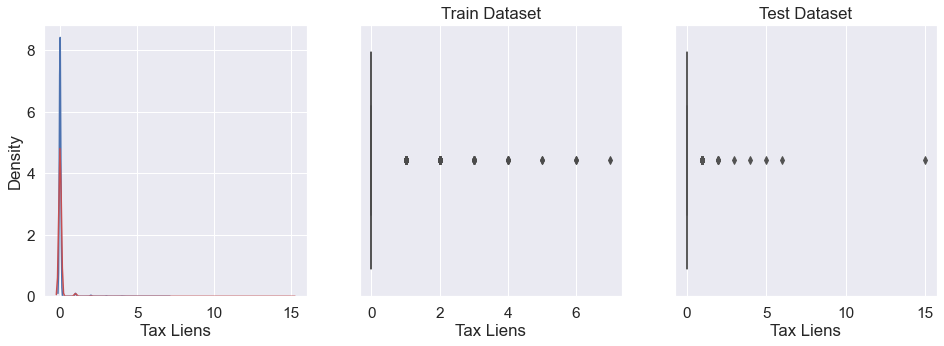

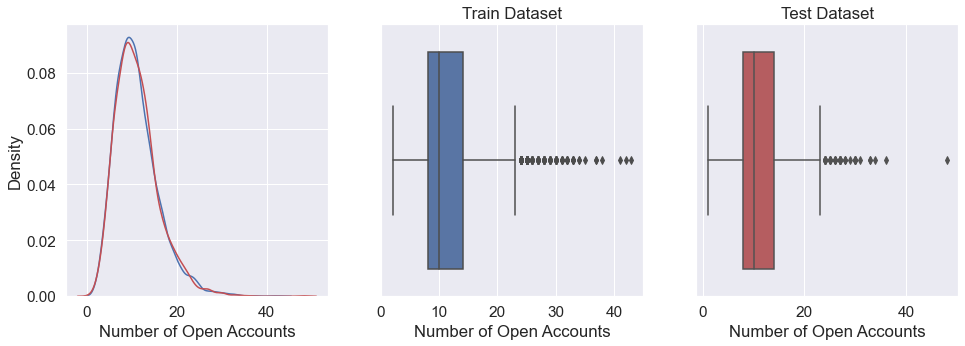

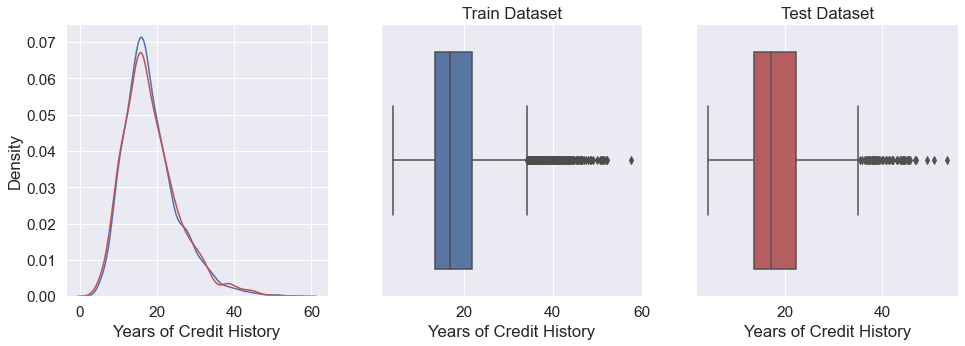

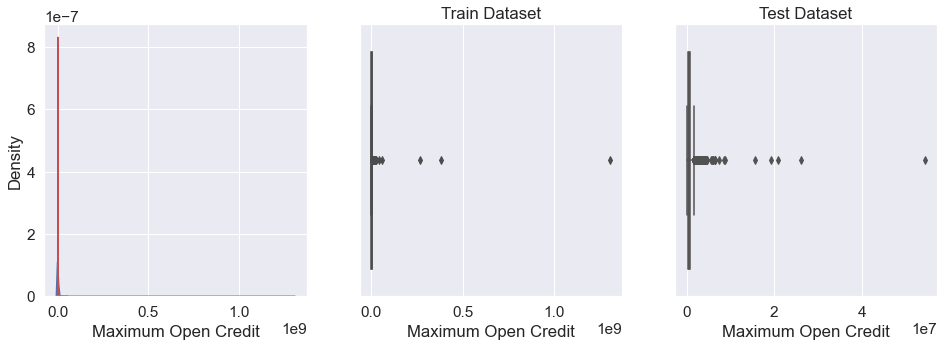

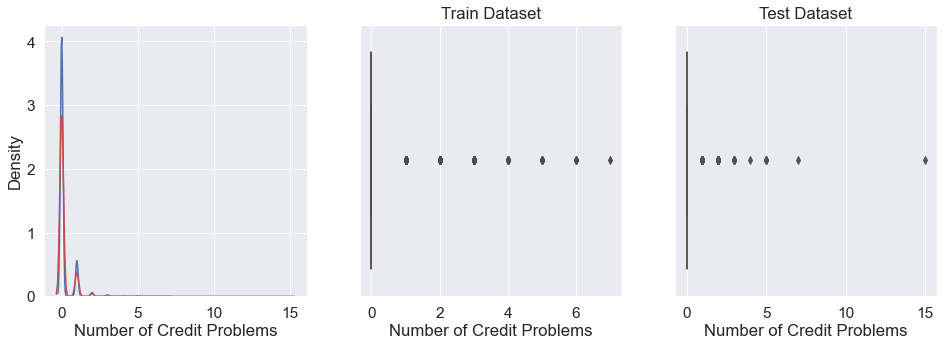

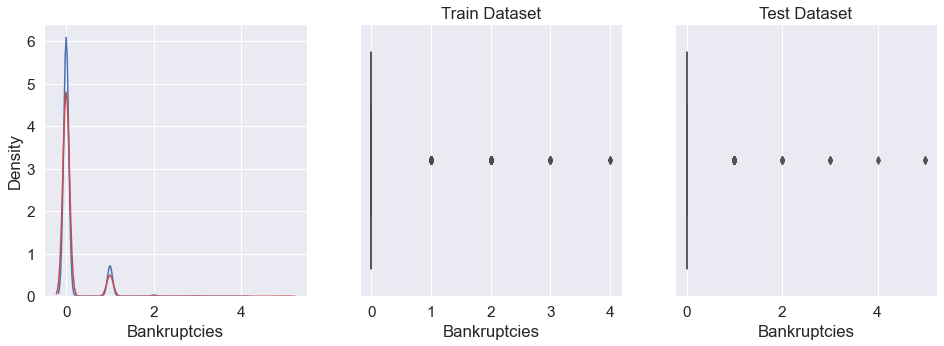

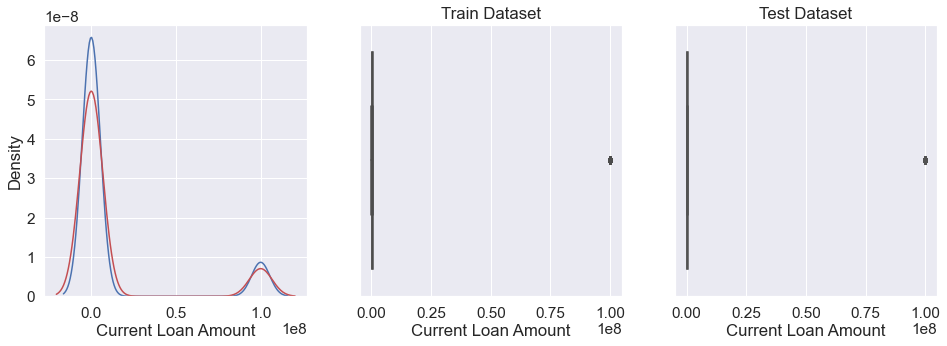

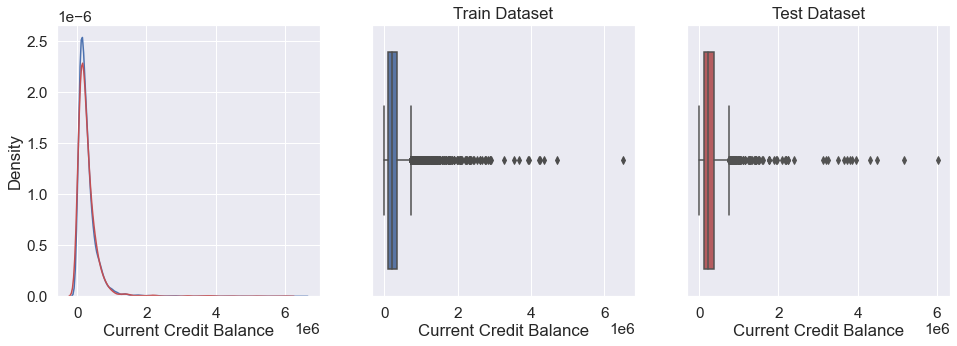

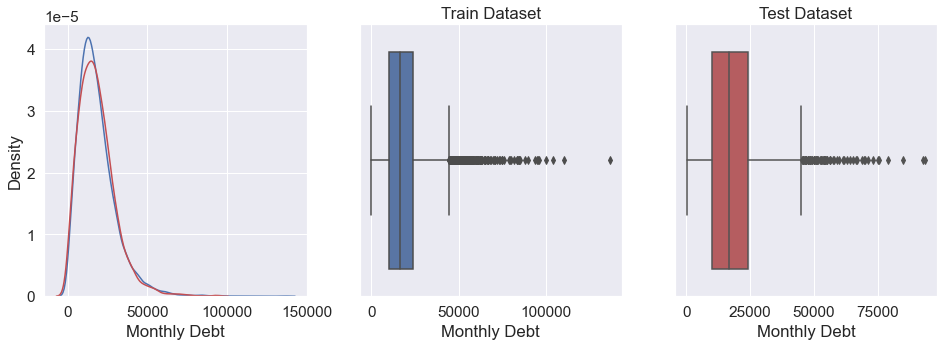

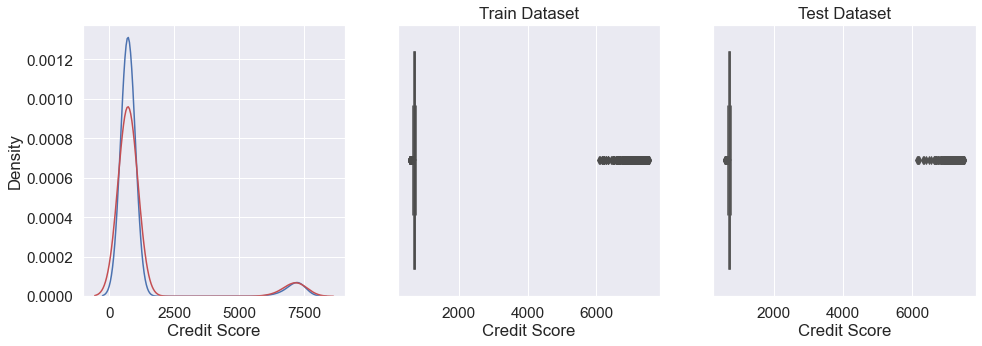

In [743]:
for col in cont_cols:
    plot_outliers(df, df_test, col)

### Выводы
* в целом гистограммы похожи 
* выявленны выбросы (сверху), но не обязательно точно выбросы

## Согласованность категориальных данных
 исследуем категориальные данные на предмет полноты в обоих выборках

In [744]:
def plot_outliers_cat(df_train, df_test, col_name, TARGET_NAME = TARGET):
    fig, ax = plt.subplots(1,2,figsize=(16,5))
   
    ax[0].set_title('Train Dataset')
    ax[1].set_title('Test Dataset')   

    sns.countplot(x=col_name, data=df_train, ax=ax[0]);
    sns.countplot(x=col_name, data=df_test, ax=ax[1]);
    plt.show()

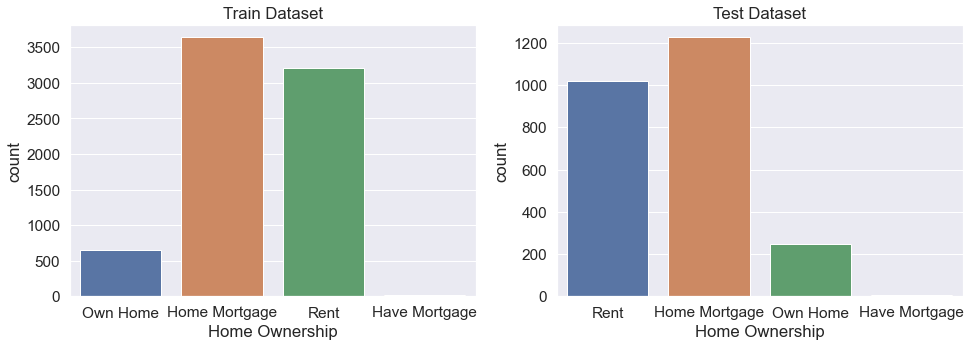

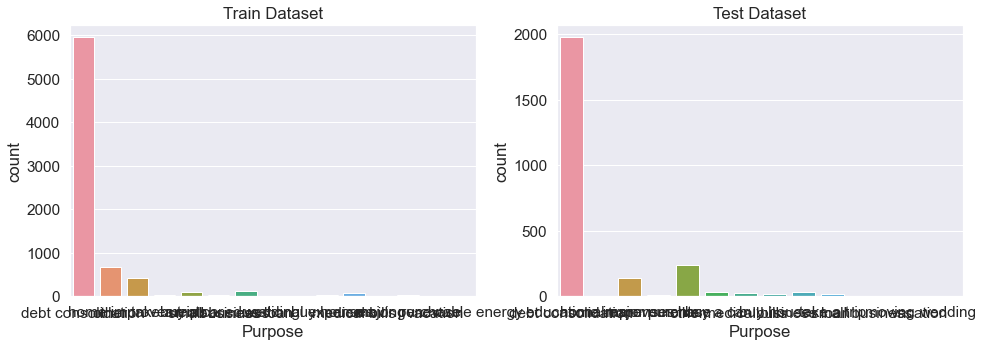

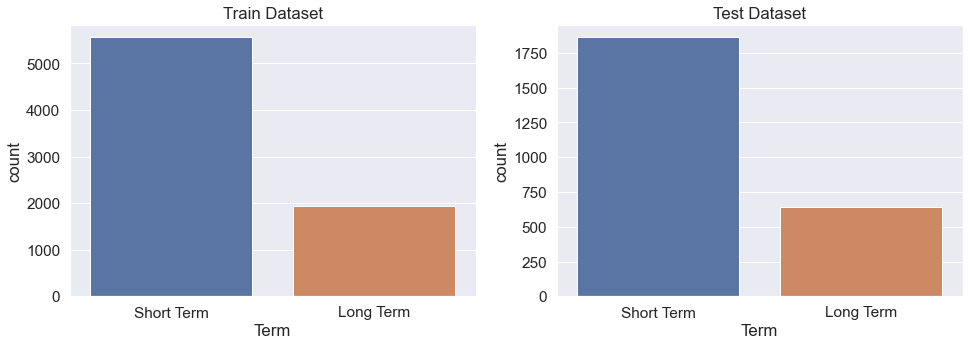

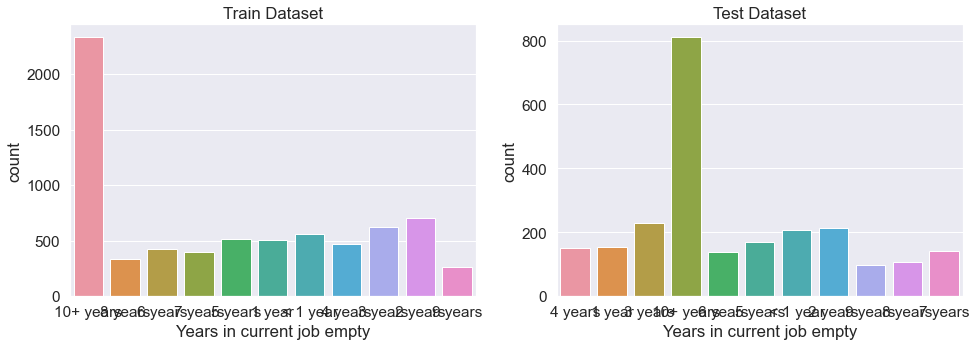

In [745]:
for col in cat_cols:
    plot_outliers_cat(df,df_test, col, TARGET_NAME = TARGET)

Выводы:
- в целом гистограммы похожи
- есть различия в категориальных признаках
- есть пропуски

- предлагается
  - Проверить данные переменные на корелляцию и PCA
  - Заменить пропуски в Years in current job - с помощью KNN imputer

## Разложим категориальные признаки на дамми переменные

In [746]:
df = pd.concat([df, pd.get_dummies(df[['Term', 'Purpose', 'Home Ownership']])], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test[['Term', 'Purpose', 'Home Ownership']])],  axis=1)

In [747]:
dummy_cols = df.select_dtypes(include=['uint8']).columns.tolist()

In [748]:
Purpose_add_col_test = set(df["Purpose"].unique()) - set(df_test["Purpose"].unique())
for i in Purpose_add_col_test:
    df_test = pd.concat([df_test, pd.DataFrame([0]*len(df_test), columns=[f'Purpose_{i}'])], axis=1)
        
Purpose_add_col_train = set(df_test["Purpose"].unique()) - set(df["Purpose"].unique())
for i in Purpose_add_col_train:
    df = pd.concat([df, pd.DataFrame([0]*len(df), columns=[f'Purpose_{i}'])], axis=1)

# Обрабатываем выбросы

In [749]:
display(df.describe())
display(df_test.describe())

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
count,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.366392e+06,5.880348,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,...,0.088667,0.000267,0.003467,0.004933,0.001067,0.00200,0.001600,0.484933,0.086267,0.427200
std,8.453392e+05,3.620092,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,...,0.284281,0.016329,0.058780,0.070069,0.032645,0.04468,0.039971,0.499806,0.280776,0.494705
min,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_renewable energy
count,1.987000e+03,2414.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,...,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00,2500.00000,2500.000000,2500.0
mean,1.366922e+06,5.949876,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,...,0.09600,0.002000,0.005600,0.001200,0.000800,0.002800,0.49,0.09920,0.408000,0.0
std,9.171252e+05,3.636563,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,...,0.29465,0.044686,0.074638,0.034627,0.028279,0.052851,0.50,0.29899,0.491561,0.0
min,1.065330e+05,0.000000,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.0
25%,8.523115e+05,3.000000,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.0
50%,1.178475e+06,6.000000,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.0
75%,1.629734e+06,10.000000,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.00000,1.000000,0.0
max,1.497561e+07,10.000000,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.000000,0.0


## Credit Score

In [750]:
credit_score_err = df['Credit Score'].loc[(df['Credit Score'] != 0) & ((df['Credit Score'] <= 350) | (df['Credit Score'] >= 850))]
credit_score_err.head()

69     6470.0
87     7440.0
94     7010.0
96     7320.0
116    7390.0
Name: Credit Score, dtype: float64

**Можно предположить, что ошибочные данные в credit_score были занесены в него с добовлением лишнего разряда**
- смотрим есть ли остаток при делении на 10

In [751]:
credit_score_err[credit_score_err % 10 != 0]

Series([], Name: Credit Score, dtype: float64)

**Проверяем теорию на тестовых данных**

In [752]:
credit_score_err_test = df_test['Credit Score'].loc[(df_test['Credit Score'] != 0) & ((df_test['Credit Score'] <= 350) | (df_test['Credit Score'] >= 850))]

print(f"max - {max(credit_score_err_test)}")
print(f"min - {min(credit_score_err_test)}")

print('\n\nЭлементы с остатком от деления на 10 не равному 0:')
credit_score_err_test[credit_score_err_test % 10 != 0]

max - 7480.0
min - 6130.0


Элементы с остатком от деления на 10 не равному 0:


Series([], Name: Credit Score, dtype: float64)

**Добавляем столбец с изменнёнными данными**

In [753]:
df['Credit Score old'] = df['Credit Score']
df['Credit Score'].iloc[credit_score_err.index] = df['Credit Score'].iloc[credit_score_err.index] / 10

In [754]:
df_test['Credit Score old'] = df_test['Credit Score']
df_test['Credit Score'].iloc[credit_score_err_test.index] = df_test['Credit Score'].iloc[credit_score_err_test.index] / 10

## Current Loan Amount

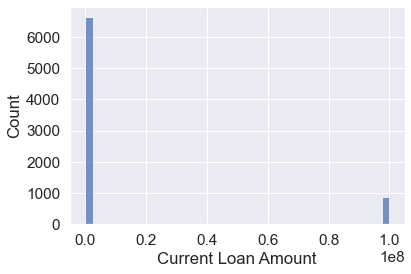

In [755]:
sns.histplot(df['Current Loan Amount'], bins = 40)
plt.show()

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Count'>

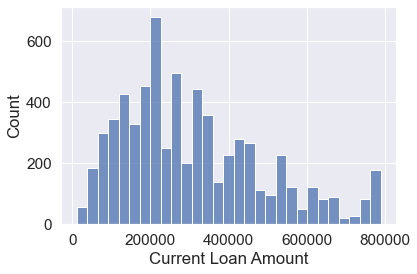

In [756]:
sns.histplot(df['Current Loan Amount'][df['Current Loan Amount'] != 99999999.0])

**У нас есть неверно заполненные данные**

Заменим выбросы на пропуски и дадим KKN imputer их заполнить

In [757]:
df['Current Loan Amount'][df['Current Loan Amount'] == 99999999.0] = None
df_test['Current Loan Amount'][df_test['Current Loan Amount'] == 99999999.0] = None

## Замена пропусков моделью KNN imputer

In [758]:
from sklearn.impute import KNNImputer

In [759]:
imputer = KNNImputer()

Обучаем imputer

In [760]:
dummy_cols + cont_cols

['Term_Long Term',
 'Term_Short Term',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_renewable energy',
 'Purpose_small business',
 'Purpose_take a trip',
 'Purpose_vacation',
 'Purpose_wedding',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [761]:
df['Bankruptcies empty'] = df['Bankruptcies']
df_test['Bankruptcies empty'] = df_test['Bankruptcies']
df_test['Annual Income empty'] = df_test['Annual Income']
df_test['Credit Score empty'] = df_test['Credit Score']

imputer.fit(df[dummy_cols + cont_cols])

KNNImputer()

### Можно заметить что в Credit Score и Annual Income одиноковое количество пропусков
проверим совпадают ли они

In [762]:
df.loc[(df['Credit Score'].isna() == True) & (df['Annual Income'].isna() == True), ['Credit Score', 'Annual Income']]

,Credit Score,Annual Income
5,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
16,NaN,NaN
...,...,...
7482,NaN,NaN
7492,NaN,NaN
7494,NaN,NaN
7498,NaN,NaN


совпадают ли в тесте?

In [763]:
df_test.loc[(df_test['Credit Score'].isna() == True) & (df_test['Annual Income'].isna() == True), ['Credit Score', 'Annual Income']]

,Credit Score,Annual Income
0,NaN,NaN
8,NaN,NaN
16,NaN,NaN
20,NaN,NaN
27,NaN,NaN
...,...,...
2469,NaN,NaN
2475,NaN,NaN
2479,NaN,NaN
2487,NaN,NaN


### Пропуски совпадают, создадим отдельный датасет где выбросим их
Далее будем работать с этим датасетом, так что сделаем его основным, а оригинальный запишем под другим именем

In [764]:
df_org = df
df = df.iloc[df['Credit Score'].dropna().index]

Сохраним их

In [765]:
df.to_csv(PATH_COURSE_PROJECT_DATASET_TRAIN_5943)

Сохраним в оригинальном датасете столбцы "Сredit Score" и "Annual Income" с пустыми значениями

In [766]:
df_org['Annual Income empty'] = df_org['Annual Income']
df_org['Credit Score empty'] = df_org['Credit Score']

Заполняем пустые значения

In [767]:
def fill_none(dataset):
    dataset[dummy_cols + cont_cols] = imputer.transform(dataset[dummy_cols + cont_cols])
    dataset['Years in current job'] = round(dataset['Years in current job'])
    dataset['Current Loan Amount'] = round(dataset['Current Loan Amount'])
    dataset['Bankruptcies'] = round(dataset['Bankruptcies'])
    return dataset.copy()

In [768]:
df = fill_none(df)
df_org = fill_none(df_org)
df_test = fill_none(df_test)

# Коореляция

In [769]:
base_f = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TRAIN).columns.tolist()

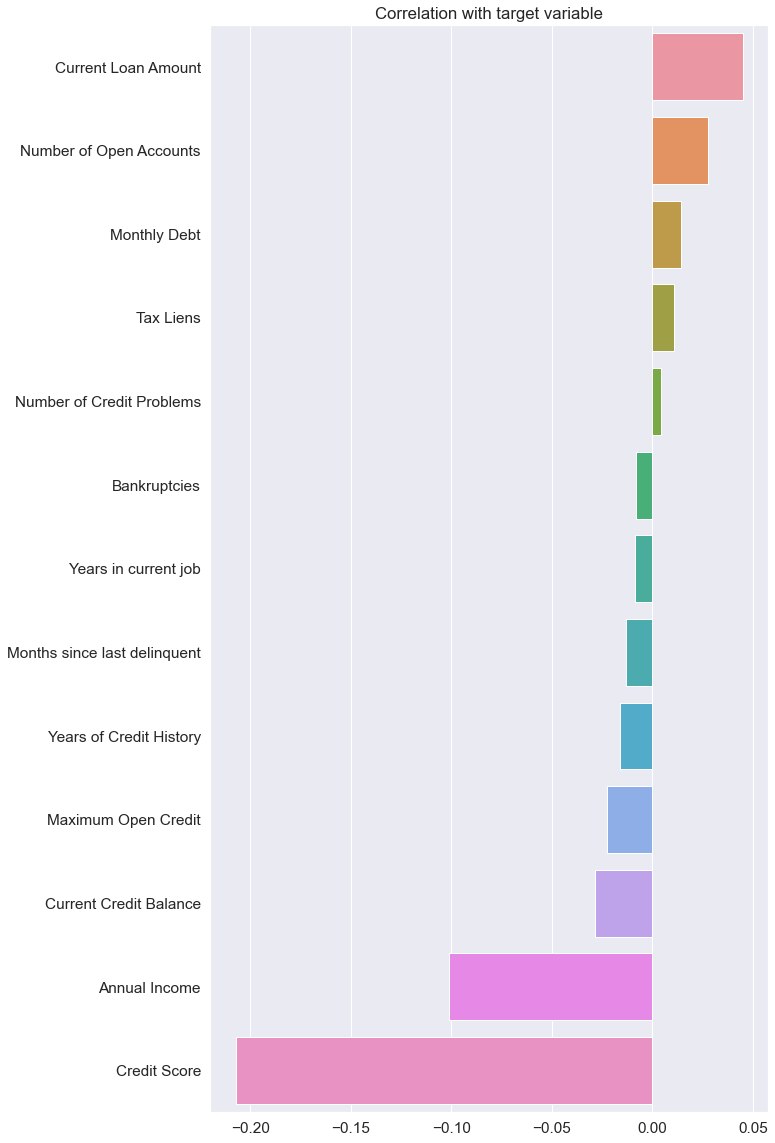

In [770]:
corr_with_target = df[base_f].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 20))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

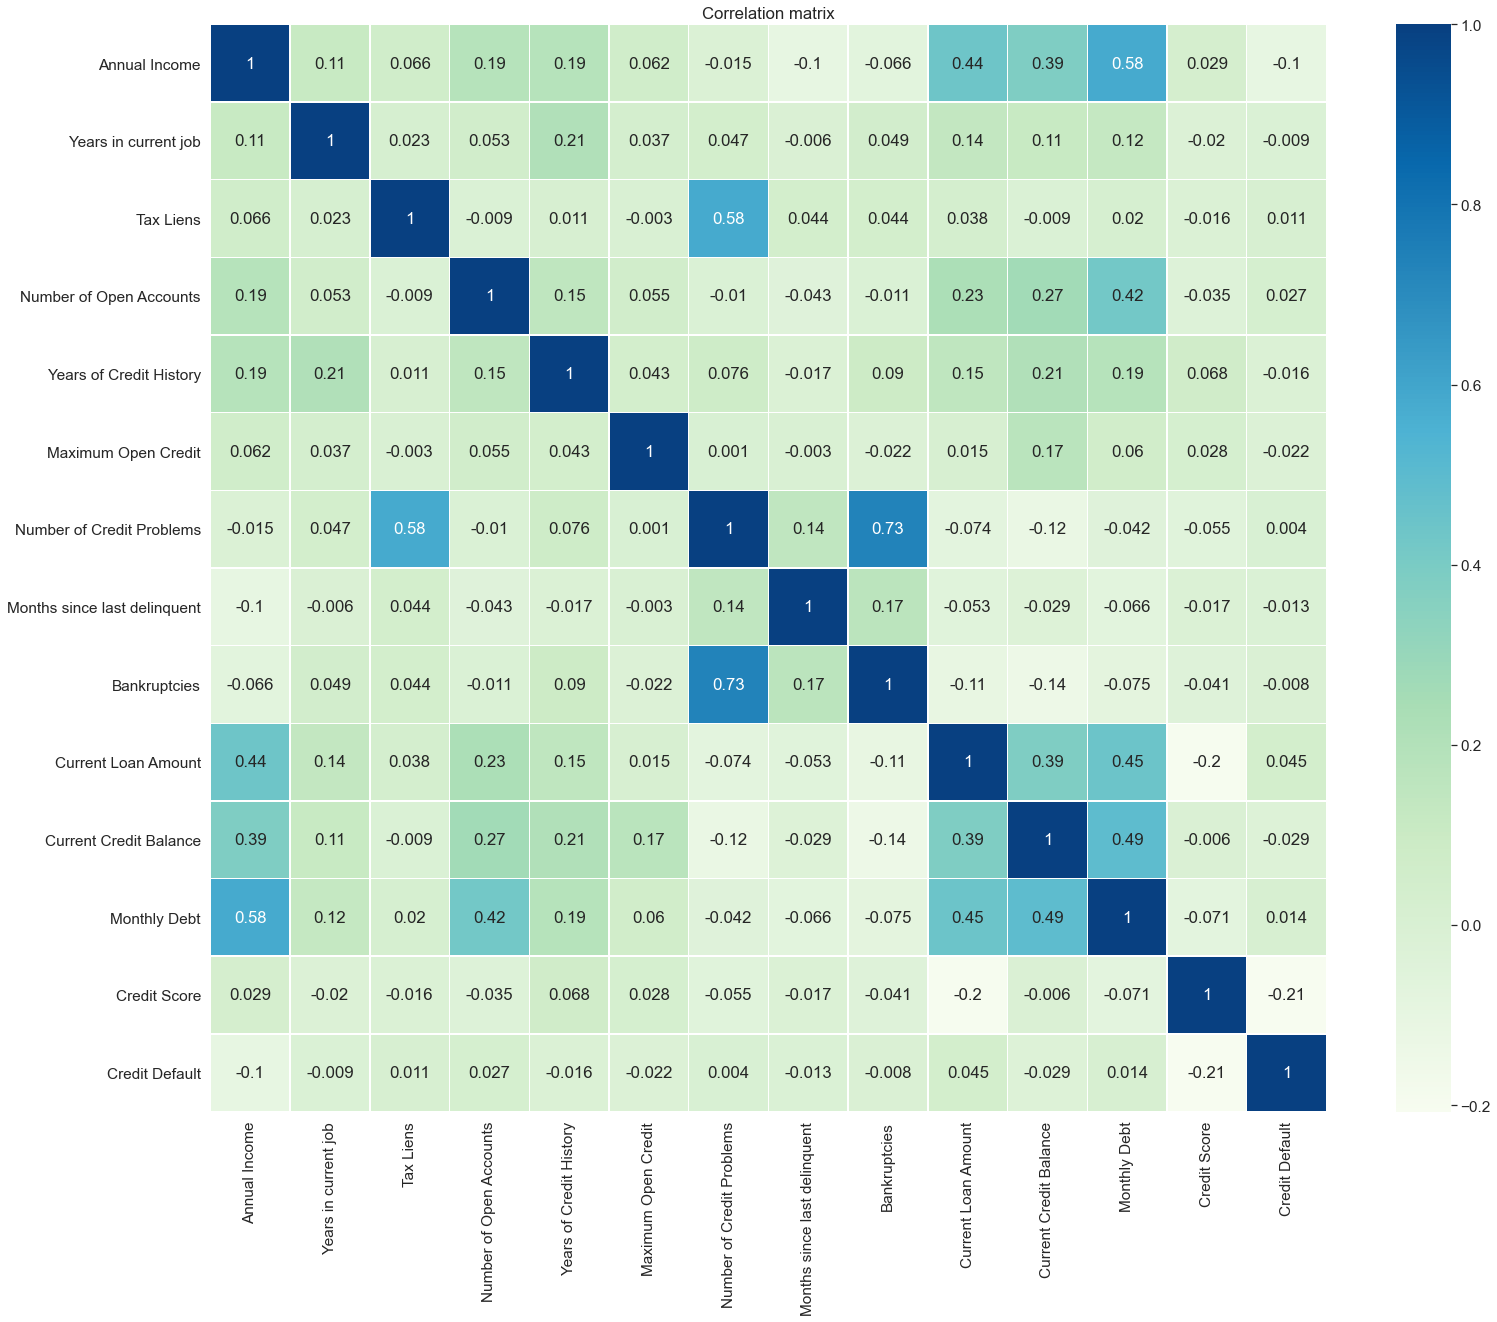

In [771]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[base_f].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [772]:
TARGET = TARGET[0]

In [773]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

# Оценка признака "Credit Score" в разрезе целевой переменной

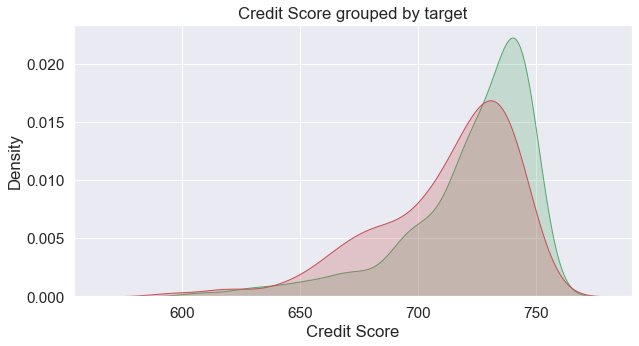

In [774]:
credit_score_with_target_s = df[['Credit Score', TARGET]].sample(1000)
credit_score_s = credit_score_with_target_s['Credit Score']
credit_score_target_0 = credit_score_s[credit_score_with_target_s[TARGET] == 0]
credit_score_target_1 = credit_score_s[credit_score_with_target_s[TARGET] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(credit_score_target_0, shade=True, label='No default', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='Default', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target')
plt.show()

## Проверка на нормальность

In [775]:
shapiro(credit_score_s)

ShapiroResult(statistic=0.8575240969657898, pvalue=4.028449308154999e-29)

## Проверка Мат ожиданий

In [776]:
mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=75884.0, pvalue=3.4095664275911734e-10)

**Признак хороший**

# Оценка признака "Term" в разрезе целевой переменной

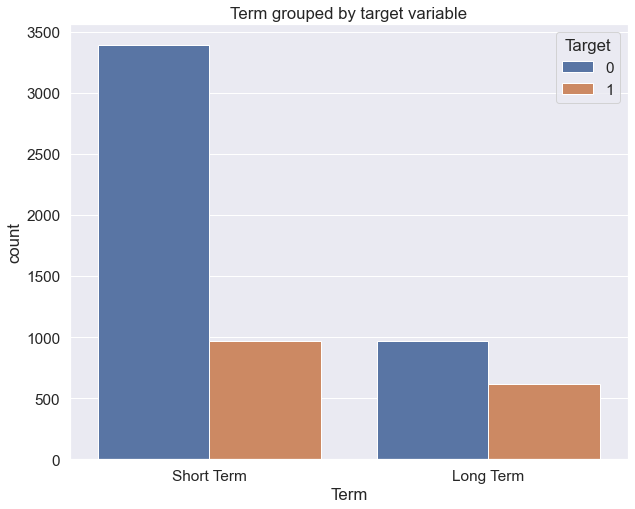

In [777]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue=TARGET, data=df)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [778]:
Term_and_target_s = df.loc[df['Term'].isin(['Short Term', 'Long Term']), ['Term', TARGET]].sample(1000)
Term_and_target_s['ID'] = Term_and_target_s.index

In [779]:
table = Term_and_target_s.pivot_table(values='ID', index='Term', columns=TARGET, aggfunc='count')
table

Credit Default,0,1
Term,,
Long Term,151,97
Short Term,584,168


In [780]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

2.10320814569314e-07

**Частоты не согласованны, не объединяем**

# Оценка признака "Annual Income" в разрезе целевой переменной

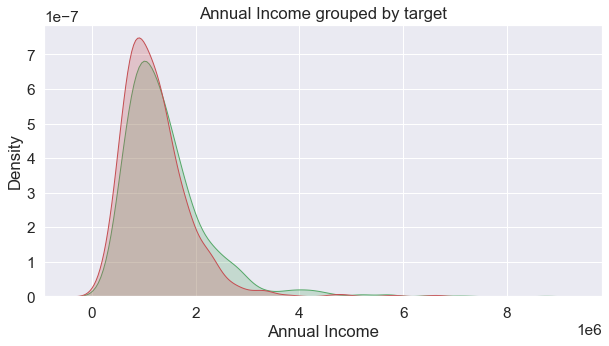

In [781]:
annual_income_with_target_s = df[['Annual Income', TARGET]].sample(2000)
annual_income_s = annual_income_with_target_s['Annual Income']
annual_income_target_0 = annual_income_s[annual_income_with_target_s[TARGET] == 0]
annual_income_target_1 = annual_income_s[annual_income_with_target_s[TARGET] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(annual_income_target_0, shade=True, label='No default', color='g')
sns.kdeplot(annual_income_target_1, shade=True, label='Default', color='r')

plt.xlabel('Annual Income')
plt.title('Annual Income grouped by target')
plt.show()

## Проверка на нормальность

In [782]:
shapiro(annual_income_s)

ShapiroResult(statistic=0.8080482482910156, pvalue=1.14906474074635e-43)

## Проверка Мат ожиданий

In [783]:
mannwhitneyu(annual_income_target_0, annual_income_target_1)

MannwhitneyuResult(statistic=335870.5, pvalue=7.031240304368993e-07)

**Признак хороший**

# Оценка признака Current Loan Amount в разрезе целевой переменной

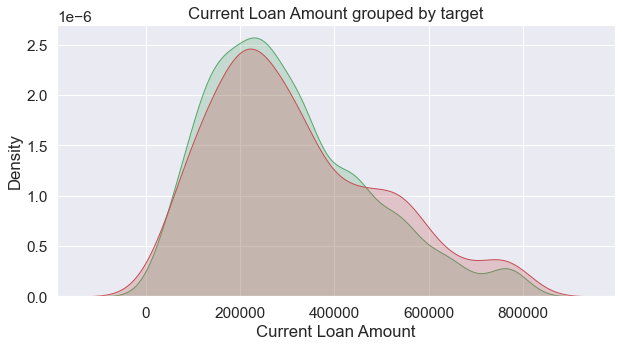

In [784]:
current_loan_with_target_s = df[['Current Loan Amount', TARGET]].sample(2000)
current_loan_s = current_loan_with_target_s['Current Loan Amount']
current_loan_target_0 = current_loan_s[current_loan_with_target_s[TARGET] == 0]
current_loan_target_1 = current_loan_s[current_loan_with_target_s[TARGET] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(current_loan_target_0, shade=True, label='No default', color='g')
sns.kdeplot(current_loan_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target')
plt.show()

## Проверка на нормальность

In [785]:
shapiro(current_loan_s)

ShapiroResult(statistic=0.9458348155021667, pvalue=1.6805048397140816e-26)

## Проверка Мат ожиданий

In [786]:
mannwhitneyu(current_loan_target_0, current_loan_target_1)

MannwhitneyuResult(statistic=374817.5, pvalue=0.06265836197709392)

**Признак хороший**

# Оценка признака "Home Ownership" в разрезе целевой переменной

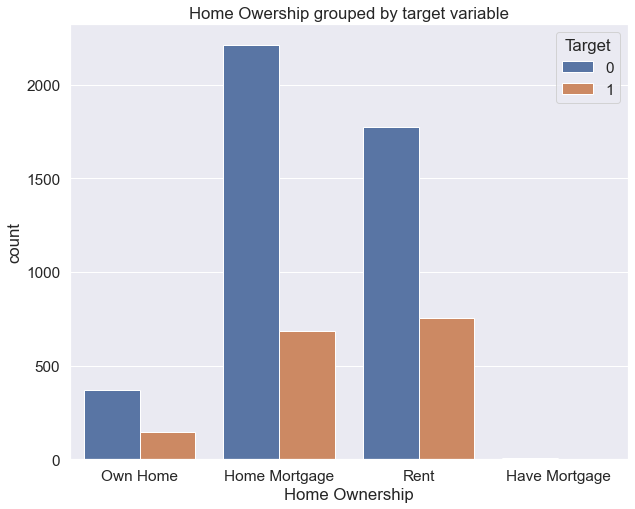

In [787]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home Ownership", hue=TARGET, data=df)
plt.title('Home Owership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

## Проверка на согласованность частот (Rent, Own Home)

In [788]:
Home_Ownership_and_target_s = df.loc[df['Home Ownership'].isin(['Rent', 'Own Home']), 
                           ['Home Ownership', TARGET]].sample(1000)
Home_Ownership_and_target_s['ID'] = Home_Ownership_and_target_s.index

In [789]:
table = Home_Ownership_and_target_s.pivot_table(values='ID', index='Home Ownership', columns=TARGET, aggfunc='count')
table

Credit Default,0,1
Home Ownership,,
Own Home,114,54
Rent,574,258


In [790]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.7724440926931925

**Частоты согласованы**

## Проверка на согласованность частот (Rent, Own Home)

In [791]:
Home_Ownership_and_target_s = df.loc[df['Home Ownership'].isin(['Home Mortgage', 'Have Mortgage']), 
                           ['Home Ownership', TARGET]]
Home_Ownership_and_target_s['ID'] = Home_Ownership_and_target_s.index

In [792]:
table = Home_Ownership_and_target_s.pivot_table(values='ID', index='Home Ownership', columns=TARGET, aggfunc='count')
table

Credit Default,0,1
Home Ownership,,
Have Mortgage,7,1
Home Mortgage,2211,686


In [793]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.45740576810070077

**Частоты согласованы**

### Уменьшим количество категорий

In [794]:
for dataset in [df, df_test, df_org]:
    dataset['Home Ownership ver.2'] = dataset['Home Ownership']
    dataset.loc[dataset['Home Ownership ver.2'] == 'Rent', ['Home Ownership ver.2']] = 'Own Home'
    dataset.loc[dataset['Home Ownership ver.2'] == 'Have Mortgage', ['Home Ownership ver.2']] = 'Home Mortgage'

# Оценка признака "Purpose" в разрезе целевой переменной

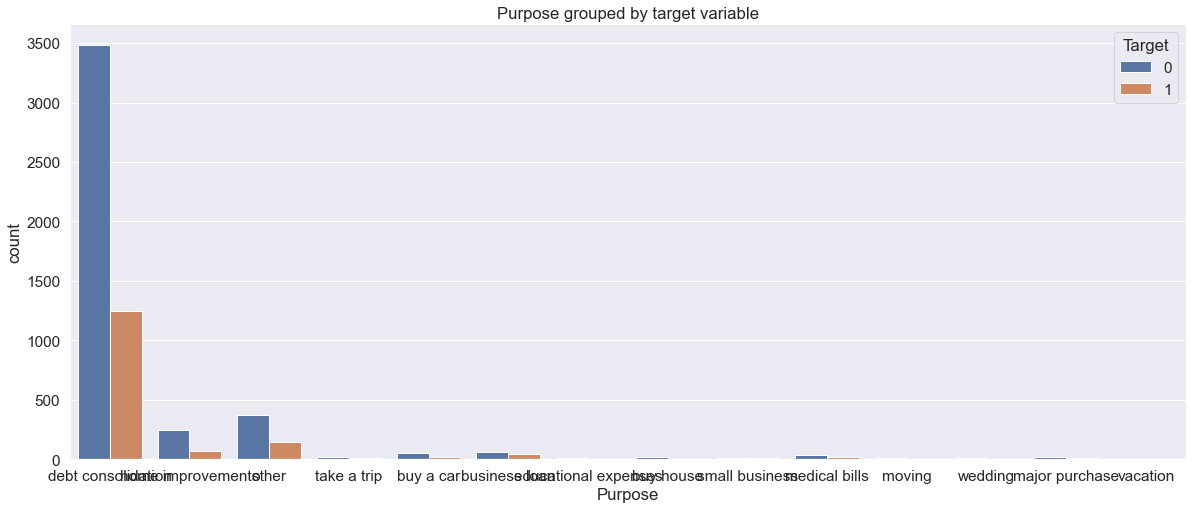

In [795]:
plt.figure(figsize=(20, 8))

sns.countplot(x="Purpose", hue=TARGET, data=df)
plt.title('Purpose grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

## Проверка на согласованность частот 

In [796]:
df_ID = df.copy()
df_ID['ID'] = df_ID.index

In [797]:
def CHi_check(df=df,col=None,list_samp =None):
    p=0
    numb_sample = np.sum(df[col].isin(list_samp))
    if numb_sample>500:
        numb_sample=500
        if numb_sample>50:
            pay1_and_target_s = df.loc[df[col].isin(list_samp), ['ID', col, TARGET]].sample(500)
            table = pay1_and_target_s.pivot_table(values='ID', index=col, columns=TARGET, aggfunc='count')
            chi2, p, dof, expected = chi2_contingency(table, correction=False)
    return p

In [798]:
alph = 0.05
for col in ['Purpose']:
    f_uniq = df_ID[col].unique()
    for i in f_uniq:
        for j in f_uniq:
            
            p = CHi_check(df=df_ID,col=col,list_samp =[i,j])
            
            if p> alph:
                print(col,': [',i,',',j,']  -',p>alph)

Purpose : [ debt consolidation , debt consolidation ]  - True
Purpose : [ debt consolidation , home improvements ]  - True
Purpose : [ debt consolidation , other ]  - True
Purpose : [ debt consolidation , take a trip ]  - True
Purpose : [ debt consolidation , medical bills ]  - True
Purpose : [ debt consolidation , wedding ]  - True
Purpose : [ debt consolidation , major purchase ]  - True
Purpose : [ debt consolidation , vacation ]  - True
Purpose : [ home improvements , debt consolidation ]  - True
Purpose : [ home improvements , other ]  - True
Purpose : [ other , debt consolidation ]  - True
Purpose : [ other , home improvements ]  - True
Purpose : [ other , other ]  - True
Purpose : [ other , take a trip ]  - True
Purpose : [ other , buy a car ]  - True
Purpose : [ other , educational expenses ]  - True
Purpose : [ other , buy house ]  - True
Purpose : [ other , medical bills ]  - True
Purpose : [ other , moving ]  - True
Purpose : [ other , wedding ]  - True
Purpose : [ other , m

In [799]:
df_ID.loc[df_ID['Purpose'].isin(['home improvements', 'business loan', 'small business']), ['Purpose']] = 'debt consolidation'
df_ID.loc[df_ID['Purpose'].isin(['buy house', 'moving', 'wedding', 'take a trip', 'buy a car', 'vacation', 'major purchase']), ['Purpose']] = 'other'

In [800]:
df['Purpose ver.2'] = df_ID['Purpose']
df_test['Purpose ver.2'] = df_test['Purpose']
df_org['Purpose ver.2'] = df_org['Purpose']

df_test.loc[df_test['Purpose ver.2'].isin(['buy house', 'moving', 'wedding', 'take a trip', 'buy a car', 'vacation', 'major purchase']), ['Purpose ver.2']] = 'other'
df_test.loc[df_test['Purpose ver.2'].isin(['home improvements', 'business loan', 'small business']), ['Purpose ver.2']] = 'debt consolidation'

df_org.loc[df_org['Purpose ver.2'].isin(['renewable energy', 'buy house', 'moving', 'wedding', 'take a trip', 'buy a car', 'vacation', 'major purchase']), ['Purpose ver.2']] = 'other'
df_org.loc[df_org['Purpose ver.2'].isin(['home improvements', 'business loan', 'small business']), ['Purpose ver.2']] = 'debt consolidation'


**Разложим новые стобцы Home Ownership и Purpose на дамми переменные и запишим их названия в отдельный список**

In [801]:
dummy_cols_2 = dummy_cols[:1] + pd.get_dummies(df[['Purpose ver.2', 'Home Ownership ver.2']], drop_first=True).columns.tolist()

df = pd.concat([df, pd.get_dummies(df[['Purpose ver.2', 'Home Ownership ver.2']])], axis=1)
df[['Purpose ver.2', 'Home Ownership ver.2']] = df[['Purpose ver.2', 'Home Ownership ver.2']].astype('object')

In [802]:
df_test = pd.concat([df_test, pd.get_dummies(df_test[['Purpose ver.2', 'Home Ownership ver.2']])], axis=1)
df_test[['Purpose ver.2', 'Home Ownership ver.2']] = df_test[['Purpose ver.2', 'Home Ownership ver.2']].astype('object')

In [803]:
df_org = pd.concat([df_org, pd.get_dummies(df_org[['Purpose ver.2', 'Home Ownership ver.2']])], axis=1)
df_org[['Purpose ver.2', 'Home Ownership ver.2']] = df_org[['Purpose ver.2', 'Home Ownership ver.2']].astype('object')

# Оценка признака "Number of Open Accounts" в разрезе целевой переменной

In [804]:
df[['Number of Open Accounts', TARGET]]

,Number of Open Accounts,Credit Default
0,11.0,0
1,15.0,1
2,11.0,0
3,8.0,0
4,13.0,0
...,...,...
7491,18.0,0
7493,14.0,1
7495,3.0,0
7496,10.0,1


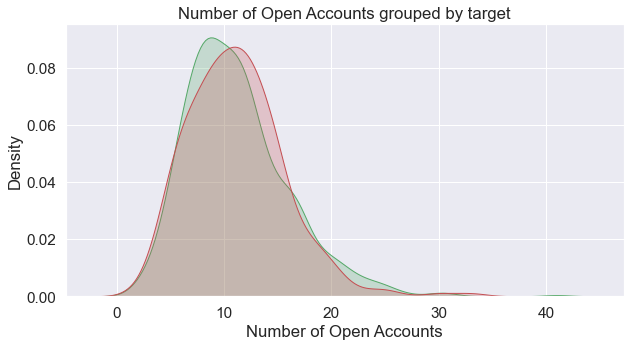

In [805]:
number_acc_with_target_s = df[['Number of Open Accounts', TARGET]].sample(1000)
number_acc_s = number_acc_with_target_s['Number of Open Accounts']
number_acc_target_0 = number_acc_s[number_acc_with_target_s[TARGET] == 0]
number_acc_target_1 = number_acc_s[number_acc_with_target_s[TARGET] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(number_acc_target_0, shade=True, label='No default', color='g')
sns.kdeplot(number_acc_target_1, shade=True, label='Default', color='r')

plt.xlabel('Number of Open Accounts')
plt.title('Number of Open Accounts grouped by target')
plt.show()

## Проверка на нормальность

In [806]:
shapiro(number_acc_s)

ShapiroResult(statistic=0.94097501039505, pvalue=1.664358478290583e-19)

## Проверка эквивалентности мат. ожадиний

In [807]:
mannwhitneyu(number_acc_target_0, number_acc_target_1)

MannwhitneyuResult(statistic=98604.0, pvalue=0.3536183016988982)

**Мат ожидания эквивалентны, признак не очень хороший - кондидат на иключение из модели**

## Заменим выбросы (слишком большие значения) в тестовых данных на максимальные значения из трейна

In [808]:
df_test.loc[(df_test['Number of Credit Problems'] > 7) | (df_test['Tax Liens'] > 7),
            ['Number of Credit Problems', 'Tax Liens']] = 7

## Создадим новый признак процентной сосотовляющей Monthly Debt от Current Loan Amount
сохраним его под именем Monthly Debt так как процентный признак стабильнее, но и старый оставим

In [809]:
def percent_monthly_debt(dataset):
    dataset['Monthly Debt old'] = dataset['Monthly Debt']
    for n in dataset.index:
        dataset['Monthly Debt'].loc[n] = dataset['Current Loan Amount'].loc[n] / dataset['Monthly Debt'].loc[n] if dataset['Monthly Debt'].loc[n] != 0 else 0 

In [810]:
percent_monthly_debt(df)
percent_monthly_debt(df_org)
percent_monthly_debt(df_test)

# Hyper Tuning

In [811]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler
from imblearn.under_sampling import TomekLinks
import itertools
from imblearn.pipeline import Pipeline as SM_Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

In [812]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [813]:
# 3.4. Пользовательские функции
def parse_params(param_grid, model_label):
    param_dict = dict()
    for key, value in param_grid.items():
        param_dict[model_label+"__"+key] = value
    return param_dict


def show_proba_calibration_plots(y_predicted_probs, y_true_labels, p_min, p_max, p_step):
    y_predicted_probs = y_predicted_probs[:,1]
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(p_min, p_max, p_step):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()
    
    
def update_predict_by_prob(y_true, predict_probas, prob_min, prob_max, prob_steps, score='f1', show_chart=False):
    if score=='f1':
        score_estimator = f1_score
    elif score=='accuracy':
        score_estimator = accuracy_score
    else:
        print('wrong score name')
        return None
    prob_range = np.linspace(prob_min, prob_max, prob_steps)
    scores = []
    for p in prob_range:
        predict_rebalanced = np.array([1 if x>=p else 0 for x in predict_probas[:,1]])
        scores.append(score_estimator(y_true, predict_rebalanced))
    if show_chart:
        figure = plt.figure(figsize = (5, 4))
        plt.ylabel('Scores')
        plt.xlabel('Probability threshold')
        plt.plot(prob_range, scores, label=score, linewidth=4)
        plt.title("Best Threshold Probability Search")
        plt.show()
    scores = np.array(scores)
    best_prob = prob_range[scores.argmax()]
    print(f'best threshold probability = {best_prob}')
    predict_rebalanced_final = np.array([1 if x>=best_prob else 0 for x in predict_probas[:,1]])
    return predict_rebalanced_final, best_prob

In [814]:
dataset_list = [df, df_test, df_org]
for cat in df.select_dtypes(include='object').columns.drop('Years in current job empty'):
    dict_of_values_name = dict()
    repeat_number = 0
    for dataset in dataset_list:
        n = 0
        dataset[f'{cat}_for_LGBM'] = dataset[cat].copy()
        for value_name in dataset[f'{cat}_for_LGBM'].value_counts().index:
            if repeat_number == 0:
                dataset[f'{cat}_for_LGBM'].loc[dataset[f'{cat}_for_LGBM'] == value_name] = n
                dict_of_values_name[value_name] = n
                n += 1
            if repeat_number == 1:
                try:
                    dataset[f'{cat}_for_LGBM'].loc[dataset[f'{cat}_for_LGBM'] == value_name] = dict_of_values_name[value_name]
                except Exception as e:
                    dataset[f'{cat}_for_LGBM'].loc[dataset[f'{cat}_for_LGBM'] == value_name] = dict_of_values_name['other']  
        dataset[f'{cat}_for_LGBM'] = dataset[f'{cat}_for_LGBM'].astype('int64')
    repeat_number +=1

Запишем категориальные признаки для LGBM и CATB

In [815]:
cat_features_LGBM = ['Home Ownership_for_LGBM', 'Purpose_for_LGBM', 'Term_for_LGBM']
cat_features_LGBM_2 = ['Home Ownership ver.2_for_LGBM', 'Purpose ver.2_for_LGBM', 'Term_for_LGBM']

In [816]:
cat_features_CATB = ['Home Ownership', 'Purpose', 'Term']
cat_features_CATB_2 = ['Home Ownership ver.2', 'Purpose ver.2', 'Term']

In [817]:
def category_for_CATB(dataset):
    for colname in set(cat_features_CATB + cat_features_CATB_2):
        dataset[colname] = pd.Categorical(dataset[colname])
    return dataset

In [818]:
df = category_for_CATB(df)
df_org = category_for_CATB(df_org)
df_test = category_for_CATB(df_test)

Проверяем соостветствие датасетов

In [819]:
new_fearures_list = df_test.columns.tolist()
print(f'Нет в тесте:')
for i in df.columns.tolist():
    try:
        new_fearures_list.remove(i)
    except:
        print(i)

new_fearures_list = df.columns.tolist()
print(f'\nНет в трейне:')
for i in df_test.columns.tolist():
    try:
        new_fearures_list.remove(i)
    except:
        print(i)
        
new_fearures_list = df.columns.tolist()
print(f'\nРазличия между урезанным и оригинальным:')
for i in df_org.columns.tolist():
    try:
        new_fearures_list.remove(i)
    except:
        print(i)
        
new_fearures_list = df_test.columns.tolist()
print(f'\nРазличия между урезанным и тестом:')
for i in df_org.columns.tolist():
    try:
        new_fearures_list.remove(i)
    except:
        print(i)   


Нет в тесте:
Credit Default

Нет в трейне:
Annual Income empty
Credit Score empty

Различия между урезанным и оригинальным:
Annual Income empty
Credit Score empty

Различия между урезанным и тестом:
Credit Default


In [820]:
full_features_list = [col for col in df_org.columns.tolist() if df_org[col].count() == 7500]
full_features_list.remove(TARGET)

## Нормализация данных

In [825]:
cont_cols.append('Monthly Debt old')

scaler = StandardScaler()

df_norm = df.copy()
df_norm_org = df_org.copy()
df_test_norm = df_test.copy()

df_norm[cont_cols] = scaler.fit_transform(df_norm[cont_cols])

df_norm_org[cont_cols] = scaler.fit_transform(df_norm_org[cont_cols])

df_test_norm[cont_cols] = scaler.transform(df_test_norm[cont_cols])


df = df_norm.copy()
df_org = df_norm_org.copy()
df_test = df_test_norm.copy()

cont_cols.remove('Monthly Debt old')

In [142]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

## Разбиение на train & test

In [143]:
df[['Term_Long Term', 'Term_Short Term']] = df[['Term_Long Term', 'Term_Short Term']].astype('uint8')

In [828]:
X = df[full_features_list]
y = df[TARGET]

X_org = df_org[full_features_list]
y_org = df_org[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, shuffle=True, test_size=0.30)

## Балансировка данных

In [146]:
all_categorical_features = set(cat_features_CATB + cat_features_CATB_2 + cat_features_LGBM + cat_features_LGBM_2 + dummy_cols + dummy_cols_2)

In [147]:
sm = SMOTENC(categorical_features=[df[full_features_list].columns.get_loc(col) for col in all_categorical_features], n_jobs=-1)
sm_org = SMOTENC(categorical_features=[df_org[full_features_list].columns.get_loc(col) for col in all_categorical_features], n_jobs=-1)

In [155]:
ros = RandomOverSampler()

**df**

балансировка RandomOverSampler

In [829]:
X_train_ros, y_train_ros = ros.fit_sample(X_train[cont_cols + dummy_cols_2], y_train)

print(f"Before OverSampling, counts of label '1': {sum(y_train==1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train==0)} \n")
print(f'After OverSampling, the shape of X_train: {X_train_ros.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_ros.shape} \n')
print(f"After OverSampling, counts of label '1': {sum(y_train_ros==1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_ros==0)}")

Before OverSampling, counts of label '1': 1108
Before OverSampling, counts of label '0': 3052 

After OverSampling, the shape of X_train: (6104, 17)
After OverSampling, the shape of y_train: (6104,) 

After OverSampling, counts of label '1': 3052
After OverSampling, counts of label '0': 3052


создаём категориальный признак 'Purpose ver.2' для CatB

In [830]:
X_train_ros['Purpose ver.2_cat'] = X_train_ros['Purpose ver.2_other']

X_train_ros.loc[X_train_ros['Purpose ver.2_educational expenses'] == 1, ['Purpose ver.2_cat']] = 3

X_train_ros.loc[X_train_ros['Purpose ver.2_medical bills'] == 1, ['Purpose ver.2_cat']] = 2

In [186]:
X_test['Purpose ver.2_cat'] = X_test['Purpose ver.2_other']

X_test.loc[X_test['Purpose ver.2_educational expenses'] == 1, ['Purpose ver.2_cat']] = 3

X_test.loc[X_test['Purpose ver.2_medical bills'] == 1, ['Purpose ver.2_cat']] = 2

балансировка SMOTENC (с категориальными)

In [852]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print(f"Before OverSampling, counts of label '1': {sum(y_train==1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train==0)} \n")
print(f'After OverSampling, the shape of X_train: {X_train_res.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_res.shape} \n')
print(f"After OverSampling, counts of label '1': {sum(y_train_res==1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_res==0)}")

Before OverSampling, counts of label '1': 1108
Before OverSampling, counts of label '0': 3052 

After OverSampling, the shape of X_train: (6104, 50)
After OverSampling, the shape of y_train: (6104,) 

After OverSampling, counts of label '1': 3052
After OverSampling, counts of label '0': 3052


**df_org**

балансировка RandomOverSampler

In [831]:
X_train_org_ros, y_train_org_ros = ros.fit_sample(X_train_org[cont_cols + dummy_cols_2], y_train_org)

print(f"Before OverSampling, counts of label '1': {sum(y_train==1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train==0)} \n")
print(f'After OverSampling, the shape of X_train: {X_train_org_ros.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_org_ros.shape} \n')
print(f"After OverSampling, counts of label '1': {sum(y_train_org_ros==1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_org_ros==0)}")

Before OverSampling, counts of label '1': 1108
Before OverSampling, counts of label '0': 3052 

After OverSampling, the shape of X_train: (7514, 17)
After OverSampling, the shape of y_train: (7514,) 

After OverSampling, counts of label '1': 3757
After OverSampling, counts of label '0': 3757


создаём категориальный признак 'Purpose ver.2' для CatB

In [832]:
X_train_org_ros['Purpose ver.2_cat'] = X_train_org_ros['Purpose ver.2_other']

X_train_org_ros.loc[X_train_org_ros['Purpose ver.2_educational expenses'] == 1, ['Purpose ver.2_cat']] = 3

X_train_org_ros.loc[X_train_org_ros['Purpose ver.2_medical bills'] == 1, ['Purpose ver.2_cat']] = 2

In [833]:
X_test_org['Purpose ver.2_cat'] = X_test_org['Purpose ver.2_other']

X_test_org.loc[X_test_org['Purpose ver.2_educational expenses'] == 1, ['Purpose ver.2_cat']] = 3

X_test_org.loc[X_test_org['Purpose ver.2_medical bills'] == 1, ['Purpose ver.2_cat']] = 2

In [834]:
df_test['Purpose ver.2_cat'] = df_test['Purpose ver.2_other']

df_test.loc[df_test['Purpose ver.2_educational expenses'] == 1, ['Purpose ver.2_cat']] = 3

df_test.loc[df_test['Purpose ver.2_medical bills'] == 1, ['Purpose ver.2_cat']] = 2

In [4886]:
X_train_res_org, y_train_res_org = sm_org.fit_sample(X_train_org, y_train_org)

print(f"Before OverSampling, counts of label '1': {sum(y_train_org==1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train_org==0)} \n")
print(f'After OverSampling, the shape of X_train: {X_train_res_org.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_res_org.shape} \n')
print(f"After OverSampling, counts of label '1': {sum(y_train_res_org==1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_res_org==0)}")

Before OverSampling, counts of label '1': 1479
Before OverSampling, counts of label '0': 3771 

After OverSampling, the shape of X_train: (7542, 50)
After OverSampling, the shape of y_train: (7542,) 

After OverSampling, counts of label '1': 3771
After OverSampling, counts of label '0': 3771


In [5182]:
X_train_ada, y_train_ada = adasyn.fit_sample(X_train[cont_cols + dummy_cols_2], y_train)

print(f"Before OverSampling, counts of label '1': {sum(y_train==1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train==0)} \n")
print(f'After OverSampling, the shape of X_train: {X_train_ada.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_ada.shape} \n')
print(f"After OverSampling, counts of label '1': {sum(y_train_ada==1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_ada==0)}")

Before OverSampling, counts of label '1': 1199
Before OverSampling, counts of label '0': 3258 

After OverSampling, the shape of X_train: (6810, 17)
After OverSampling, the shape of y_train: (6810,) 

After OverSampling, counts of label '1': 3552
After OverSampling, counts of label '0': 3258


In [5184]:
X_train_ada_one, y_train_ada_one = OneSidedSelection().fit_sample(X=X_train_ada, y=y_train_ada)

print(f"Before OverSampling, counts of label '1': {sum(y_train_ada==1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train_ada==0)} \n")
print(f'After OverSampling, the shape of X_train: {X_train_ada_one.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_ada_one.shape} \n')
print(f"After OverSampling, counts of label '1': {sum(y_train_ada_one==1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_ada_one==0)}")

Before OverSampling, counts of label '1': 3552
Before OverSampling, counts of label '0': 3258 

After OverSampling, the shape of X_train: (6721, 17)
After OverSampling, the shape of y_train: (6721,) 

After OverSampling, counts of label '1': 3463
After OverSampling, counts of label '0': 3258


## Построение и оценка бозовых моделей

### Логистическая регрессия

In [4010]:
# ?LogisticRegression

In [448]:
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train_ros[cont_cols + dummy_cols_2], y_train_ros)

y_train_pred = model_lr.predict(X_train_ros[cont_cols + dummy_cols_2])
y_test_pred = model_lr.predict(X_test[cont_cols + dummy_cols_2])

get_classification_report(y_train_ros, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.61      0.66      0.64      3264
           1       0.63      0.58      0.60      3264

    accuracy                           0.62      6528
   macro avg       0.62      0.62      0.62      6528
weighted avg       0.62      0.62      0.62      6528

TEST

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1092
           1       0.37      0.56      0.44       394

    accuracy                           0.63      1486
   macro avg       0.58      0.61      0.58      1486
weighted avg       0.69      0.63      0.65      1486

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               709  383
1               173  221


### KNeighbors

In [853]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_res[cont_cols + dummy_cols_2], y_train_res)

y_train_pred = model_knn.predict(X_train_res[cont_cols + dummy_cols_2])
y_test_pred = model_knn.predict(X_test[cont_cols + dummy_cols_2])

get_classification_report(y_train_res, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      3052
           1       0.75      0.94      0.84      3052

    accuracy                           0.82      6104
   macro avg       0.84      0.82      0.81      6104
weighted avg       0.84      0.82      0.81      6104

TEST

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      1307
           1       0.31      0.52      0.39       476

    accuracy                           0.56      1783
   macro avg       0.54      0.55      0.52      1783
weighted avg       0.65      0.56      0.59      1783

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               753  554
1               227  249


### XGBoost

In [4769]:
# best f1 score on CV = 0.4695041980155887
# {'colsample_bynode': 0.8, 'learning_rate': 0.1, 'reg_lambda': 0.2, 'subsample': 0.8, 'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 150, 'n_jobs': -1, 'num_parallel_tree': 150, 'random_state': 0, 'reg_alpha': 0, 'scale_pos_weight': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [854]:
model_xgb = xgb.XGBClassifier(n_estimators=500, max_depth=1, learning_rate=0.1, reg_lambda=0.1)
model_xgb.fit(X_train_tom_org[cont_cols + dummy_cols_2], y_train_tom_org)

y_train_pred = model_xgb.predict(X_train_tom_org[cont_cols + dummy_cols_2])
y_test_pred = model_xgb.predict(X_test_org[cont_cols + dummy_cols_2])

get_classification_report(y_train_tom_org, y_train_pred, y_test_org, y_test_pred)

NameError: name 'X_train_tom_org' is not defined

In [4872]:
display(pd.Series(model_xgb.feature_importances_, index=X_train_tom_org[cont_cols + dummy_cols_2].columns).sort_values(0))
XGB_importance_f = pd.Series(model_xgb.feature_importances_, index=X_train_tom_org[cont_cols + dummy_cols_2].columns).sort_values(0).index.tolist()[5:]

Home Ownership ver.2_Own Home         0.000000
Purpose ver.2_other                   0.000000
Term_Short Term                       0.000000
Purpose ver.2_educational expenses    0.000000
Purpose ver.2_medical bills           0.000000
Years in current job                  0.025447
Years of Credit History               0.027872
Number of Credit Problems             0.028418
Purpose ver.2_debt consolidation      0.031390
Current Loan Amount                   0.037403
Current Credit Balance                0.038365
Monthly Debt                          0.042568
Maximum Open Credit                   0.048890
Home Ownership ver.2_Home Mortgage    0.065785
Annual Income                         0.105940
Term_Long Term                        0.264512
Credit Score                          0.283410
dtype: float32

### LightGBM

In [4973]:
model_lgbm = lgbm.LGBMClassifier(n_estimators=750, max_depth=6)
model_lgbm.fit(X_train_und[cont_cols + dummy_cols_2], y_train_und)

y_train_pred = model_lgbm.predict(X_train_und[cont_cols + dummy_cols_2])
y_test_pred = model_lgbm.predict(X_test[cont_cols + dummy_cols_2])

get_classification_report(y_train_und, y_train_pred, y_test, y_test_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3022
           1       1.00      1.00      1.00      2804

    accuracy                           1.00      5826
   macro avg       1.00      1.00      1.00      5826
weighted avg       1.00      1.00      1.00      5826

TEST

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1102
           1       0.79      0.74      0.77       384

    accuracy                           0.88      1486
   macro avg       0.85      0.84      0.84      1486
weighted avg       0.88      0.88      0.88      1486

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1025   77
1                 98  286


In [4972]:
model_lgbm = lgbm.LGBMClassifier(max_depth=1, n_estimators=50)
model_lgbm.fit(X_train_res[cont_cols + cat_features_LGBM_2], y_train_res)

y_train_pred = model_lgbm.predict(X_train_res[cont_cols + cat_features_LGBM_2])
y_test_pred = model_lgbm.predict(X_test[cont_cols + cat_features_LGBM_2])

get_classification_report(y_train_res, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      3067
           1       0.61      0.78      0.69      3067

    accuracy                           0.64      6134
   macro avg       0.65      0.64      0.63      6134
weighted avg       0.65      0.64      0.63      6134

TEST

              precision    recall  f1-score   support

           0       0.85      0.48      0.61      1102
           1       0.33      0.75      0.46       384

    accuracy                           0.55      1486
   macro avg       0.59      0.61      0.54      1486
weighted avg       0.71      0.55      0.57      1486

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               531  571
1                97  287


### CatBoost

# -------------------------\\/--- Последняя модель ---\\/----------------------------

In [171]:
cat_features_CATB_4 = ['Purpose ver.2_cat', 'Home Ownership ver.2_Own Home', 'Term_Long Term']

In [835]:
X_test_org['Term_Long Term'] = X_test_org['Term_Long Term'].astype('uint8')
X_train_org_ros['Term_Long Term'] = X_train_org_ros['Term_Long Term'].astype('uint8')
df_test['Term_Long Term'] = df_test['Term_Long Term'].astype('uint8')

In [607]:
features_catb_list_2 = features_catb_list

features_catb_list = cont_cols + cat_features_CATB_4

In [856]:
model_catb = catb.CatBoostClassifier(
                                     depth=4, 
                                     n_estimators=250,
                                     learning_rate=0.03, 
                                     silent=True, 
                                     l2_leaf_reg=10, 
                                     class_weights = [1, 1.8],
                                     one_hot_max_size=4,
                                     cat_features=cat_features_catb_list)

model_catb.fit(X_train_org_ros[features_catb_list], y_train_org_ros)

y_train_pred = model_catb.predict(X_train_org_ros[features_catb_list])
y_test_pred = model_catb.predict(X_test_org[features_catb_list])

# get_classification_report(y_train_org_ros, y_train_pred, y_test_org, y_test_pred)

# 3.11.4.калитбровка
predict_probas = model_catb.predict_proba(X_test_org[features_catb_list])
# show_proba_calibration_plots(predict_probas, y_test_org, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_test_org, predict_probas, 0.5, 0.7, 200, score='f1', show_chart=False)

# print(f1_score(y_test_org, predict2))

# 3.11.5. результаты
print(70*'-')

print(f'f1 on valid set after calibrating = {f1_score(y_test_org, predict2)}')
print(confusion_matrix(y_test_org, predict2))
print(classification_report(y_test_org, predict2))

best threshold probability = 0.585427135678392
----------------------------------------------------------------------
f1 on valid set after calibrating = 0.48648648648648657
[[822 808]
 [161 459]]
              precision    recall  f1-score   support

           0       0.84      0.50      0.63      1630
           1       0.36      0.74      0.49       620

    accuracy                           0.57      2250
   macro avg       0.60      0.62      0.56      2250
weighted avg       0.71      0.57      0.59      2250



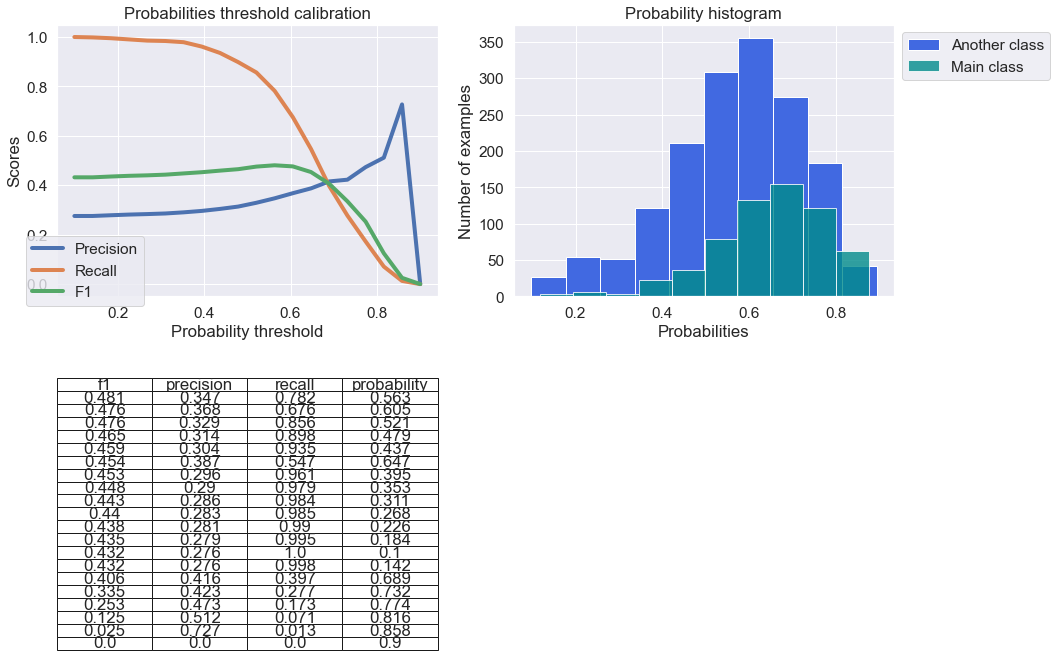

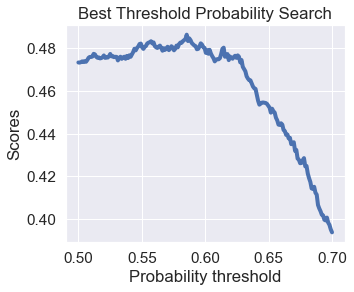

best threshold probability = 0.585427135678392
0.48648648648648657
----------------------------------------------------------------------
f1 on valid set after calibrating = 0.48648648648648657
[[822 808]
 [161 459]]
              precision    recall  f1-score   support

           0       0.84      0.50      0.63      1630
           1       0.36      0.74      0.49       620

    accuracy                           0.57      2250
   macro avg       0.60      0.62      0.56      2250
weighted avg       0.71      0.57      0.59      2250



In [857]:
# 3.11.4.калитбровка
predict_probas = model_catb.predict_proba(X_test_org[features_catb_list])
show_proba_calibration_plots(predict_probas, y_test_org, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_test_org, predict_probas, 0.5, 0.7, 200, score='f1', show_chart=True)

print(f1_score(y_test_org, predict2))

# 3.11.5. результаты
print(70*'-')

print(f'f1 on valid set after calibrating = {f1_score(y_test_org, predict2)}')
print(confusion_matrix(y_test_org, predict2))
print(classification_report(y_test_org, predict2))

In [850]:
pd.Series(model_catb.feature_importances_,
                               index=model_catb.feature_names_).sort_values(0)

Number of Credit Problems         1.511333
Purpose ver.2_cat                 2.380676
Years in current job              3.485811
Home Ownership ver.2_Own Home     5.340998
Current Credit Balance            5.359836
Years of Credit History           5.619793
Monthly Debt                      6.975235
Maximum Open Credit               7.096313
Current Loan Amount              11.193925
Annual Income                    14.175427
Term_Long Term                   17.514383
Credit Score                     19.346269
dtype: float64

In [611]:
features_catb_list = pd.Series(model_catb.feature_importances_,
                               index=model_catb.feature_names_).sort_values(0)[2:].index.tolist()

cat_features_catb_list = [col for col in cat_features_CATB_4 if col in features_catb_list]

In [858]:
# 4.2. Обучение модели на полном датасете (Liniar Regression)

threshold_prob = 0.5854

model = model_catb
model.fit(X_train_org_ros[features_catb_list], y_train_org_ros)

predict_train_probas = model.predict_proba(X_train_org_ros[features_catb_list])
predict_train = np.array([1 if x>=threshold_prob else 0 for x in predict_train_probas[:,1]])

print('Final Model CATB')
print(70*'-')
print(f'accuracy on full train set = {accuracy_score(y_train_org_ros, predict_train)}')
print(f'f1 on full train set = {f1_score(y_train_org_ros, predict_train)}')
print(confusion_matrix(y_train_org_ros, predict_train))
print(classification_report(y_train_org_ros, predict_train))
print(70*'-')

y_pred_probas = model.predict_proba(df_test[features_catb_list])
y_pred = np.array([1 if x>=threshold_prob else 0 for x in y_pred_probas[:, 1]])
y_pred = pd.DataFrame(y_pred, columns=[TARGET])

print(y_pred.shape)
y_pred.value_counts()

Final Model CATB
----------------------------------------------------------------------
accuracy on full train set = 0.6622305030609529
f1 on full train set = 0.712114337568058
[[1837 1920]
 [ 618 3139]]
              precision    recall  f1-score   support

           0       0.75      0.49      0.59      3757
           1       0.62      0.84      0.71      3757

    accuracy                           0.66      7514
   macro avg       0.68      0.66      0.65      7514
weighted avg       0.68      0.66      0.65      7514

----------------------------------------------------------------------
(2500, 1)


Credit Default
1                 1487
0                 1013
dtype: int64

In [849]:
filename = 'Navoyan_3010_catb.csv'
y_pred.to_csv(filename, index=None)

# ---------------------------/\\--- Последняя модель ---/\\---------------------------

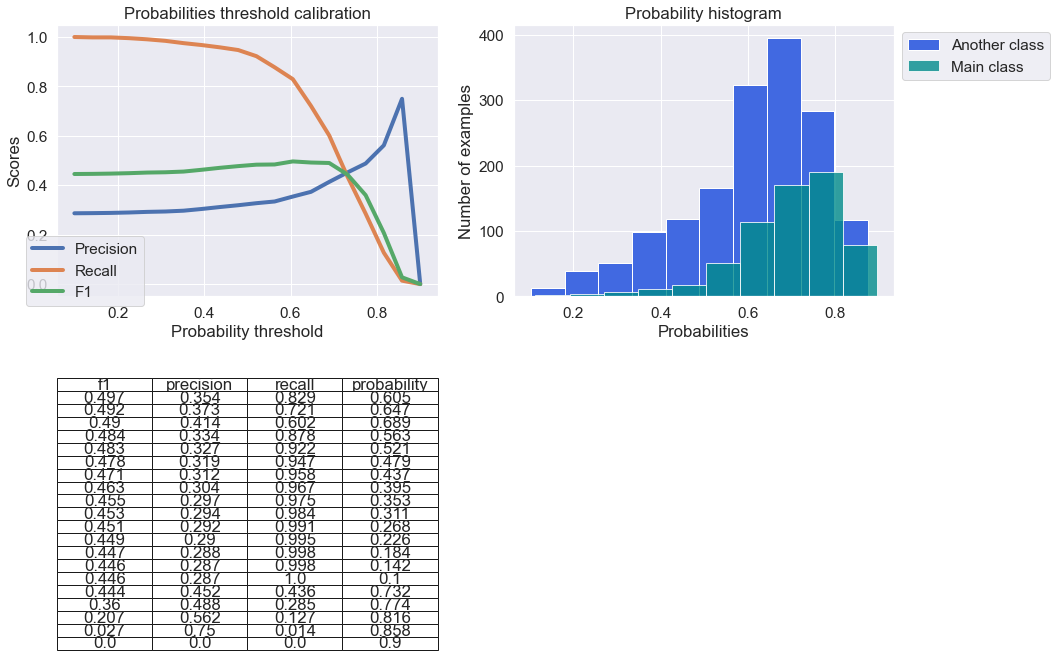

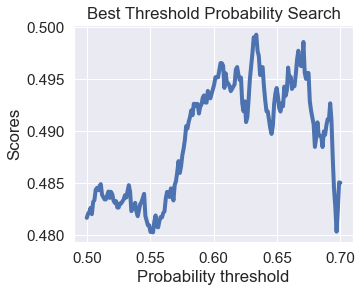

best threshold probability = 0.6336683417085427
0.49923896499238973
----------------------------------------------------------------------
f1 on valid set after calibrating = 0.49923896499238973
[[771 834]
 [153 492]]
              precision    recall  f1-score   support

           0       0.83      0.48      0.61      1605
           1       0.37      0.76      0.50       645

    accuracy                           0.56      2250
   macro avg       0.60      0.62      0.55      2250
weighted avg       0.70      0.56      0.58      2250



In [669]:
# 3.11.4.калитбровка
predict_probas = model_catb.predict_proba(X_test_org[features_catb_list])
show_proba_calibration_plots(predict_probas, y_test_org, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_test_org, predict_probas, 0.5, 0.7, 200, score='f1', show_chart=True)

print(f1_score(y_test_org, predict2))

# 3.11.5. результаты
print(70*'-')

print(f'f1 on valid set after calibrating = {f1_score(y_test_org, predict2)}')
print(confusion_matrix(y_test_org, predict2))
print(classification_report(y_test_org, predict2))

In [4340]:
# cont_cols.remove('Years in current job')
# cont_cols.remove('Monthly Debt')
# cont_cols.append('Monthly Debt old')

In [4324]:
cont_cols.remove('Number of Open Accounts')
cont_cols.remove('Tax Liens')
cont_cols.remove('Bankruptcies')

ValueError: list.remove(x): x not in list

In [4295]:
cat_features_CATB_3 = cat_features_CATB.copy()
cat_features_CATB_3.remove('Purpose')
cat_features_CATB_3.append('Purpose ver.2')

In [4296]:
cat_features_CATB_3

['Home Ownership', 'Term', 'Purpose ver.2']

In [4750]:
?xgb.XGBClassifier

In [4987]:
cv_ = KFold(n_splits=5, shuffle=True)
result_dict = dict()

adasyn = ADASYN(n_jobs=-1, sampling_strategy='auto')

tomekl = TomekLinks(n_jobs=-1, sampling_strategy='auto')

# 3.11. Настройка XG-BOOST
pipeline_steps = [
                    ('oversampler', adasyn),
                    ('undersampler', tomekl),
                    ('xgb', xgb.XGBRFClassifier(n_jobs=-1))
                     ]

# param_grid = {
#     'n_estimators': [50, 300, 500],
# #     'learning_rate': [1e-1], #0.1
#     'max_depth': [1, 2],
#     'reg_lambda': [0.1, 0.2],
#     'learning_rate': [0.1, 0.2]
#     }
# 
#  \/
#  \/
#  \/
# 
# {'learning_rate': 0.2, 'reg_lambda': 0.1,  'max_depth': 1, 'n_estimators': 50}

# 'learning_rate': 0.1, 'reg_lambda': 0.15, 'max_depth': 1,'n_estimators': 40, - 4.9

# param_grid = {
#     'n_estimators': [700, 1000, 2400, 3600],
#     'max_depth': [1, 2, 3],
#     'reg_lambda': [0.15],
#     'learning_rate': [0.1, 0.06, 0.03, 0.006]
#     }
# 
#  \/
#  \/
#  \/
# 
# 'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.1

# param_grid = {
#     'n_estimators': [700, 1000, 2400, 3600],
#     'max_depth': [1, 2, 3],
#     'reg_lambda': [0.15],
#     'learning_rate': [0.1, 0.06, 0.03, 0.006]
#     }
# 


param_grid = {
    'n_estimators': [50],
    'max_depth': [2],
    'reg_lambda': [0.15],
    'learning_rate': [0.1]
    }

XG-BOOST
----------------------------------------------------------------------
best f1 score on CV = 0.4563602637409613
{'colsample_bynode': 0.8, 'learning_rate': 0.1, 'reg_lambda': 0.15, 'subsample': 0.8, 'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'max_delta_step': 0, 'max_depth': 2, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 50, 'n_jobs': -1, 'num_parallel_tree': 50, 'random_state': 0, 'reg_alpha': 0, 'scale_pos_weight': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


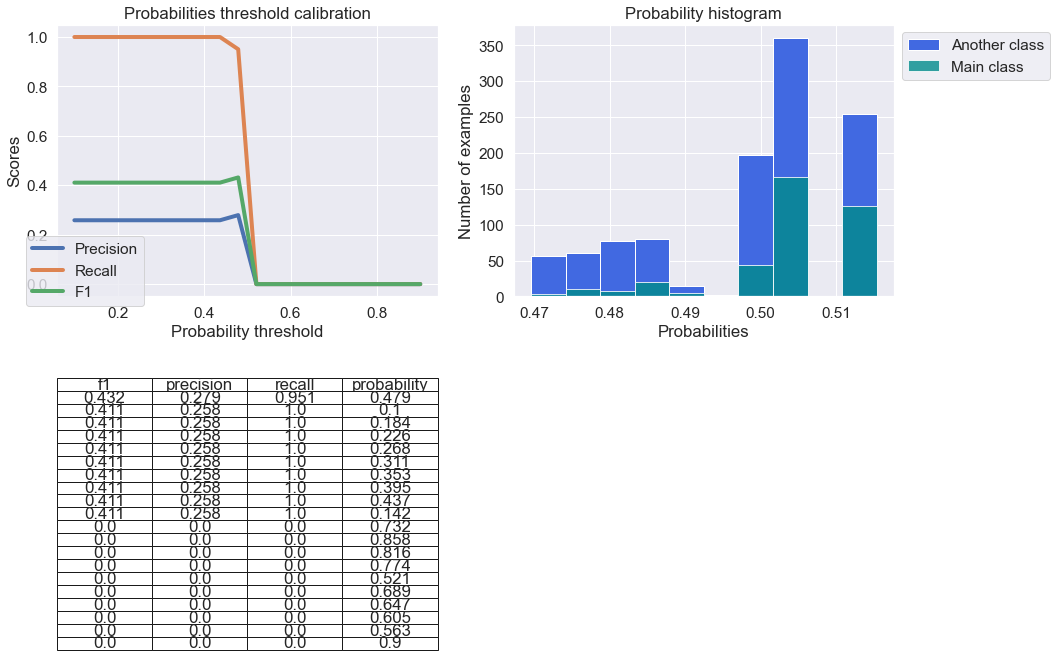

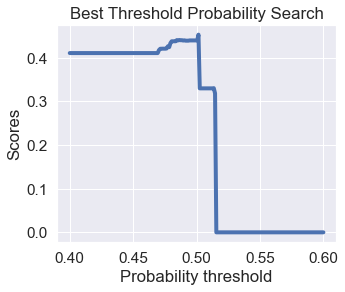

best threshold probability = 0.5015075376884423
0.4396607958251794
0.4528593508500773
----------------------------------------------------------------------
f1 on valid set = 0.4396607958251794
f1 on valid set after calibrating = 0.4528593508500773
[[485 617]
 [ 91 293]]
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1102
           1       0.32      0.76      0.45       384

    accuracy                           0.52      1486
   macro avg       0.58      0.60      0.52      1486
weighted avg       0.71      0.52      0.55      1486



In [4988]:
# 3.11.2. GridSearch
print(f'XG-BOOST')
print(70*'-')
param_grid = parse_params(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train[cont_cols + dummy_cols_2], y_train)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

# 3.11.3. Test  
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train[cont_cols + dummy_cols_2], y_train)
predict = pipe2.predict(X_test[cont_cols + dummy_cols_2])
predict_train = pipe2.predict(X_train[cont_cols + dummy_cols_2])

# 3.11.4.калитбровка
predict_probas = pipe2.predict_proba(X_test[cont_cols + dummy_cols_2])
show_proba_calibration_plots(predict_probas, y_test, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_test, predict_probas, 0.4, 0.6, 200, score='f1', show_chart=True)
print(f1_score(y_test, predict))
print(f1_score(y_test, predict2))

# 3.11.5. результаты
print(70*'-')
print(f'f1 on valid set = {f1_score(y_test, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_test, predict2)}')
print(confusion_matrix(y_test, predict2))
print(classification_report(y_test, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_test, predict2), f1_score(y_test, predict2), best_params, threshold_prob)

In [235]:
# smote = SMOTE(sampling_strategy='auto', n_jobs=-1)
smotenc = SMOTENC(categorical_features=
                [X_train[cont_cols + cat_features_CATB_2].columns.get_loc(col) for col in cat_features_CATB_2],
                n_jobs=-1,
                sampling_strategy='auto')

cv_ = KFold(n_splits=5, shuffle=True)
result_dict = dict()

adasyn = ADASYN(n_jobs=-1, sampling_strategy='auto')

tomekl = TomekLinks(n_jobs=-1, sampling_strategy='auto')

# 3.11. Настройка Cat-Boost
pipeline_steps = [
#                     ('oversampler', smotenc),
#                     ('undersampler', tomekl),
                    ('catb', catb.CatBoostClassifier(silent=True))
                     ]


# param_grid = {
# #     'boosting_type': ['goss'],
#     'n_estimators': [10, 30, 50, 100],
#     'learning_rate': [1e-1], #0.1
#     'depth': [1,3,5],
#     'l2_leaf_reg': [0.2, 0.6],
#     'class_weights': [[], [1, 2.5]]
# #     'cat_features': [cat_features_CATB_2]
# #     'reg_lambda': [0.5], 
# #     'num_leaves': [300] 
#     }
# ##############################################
# param_grid = {
#     'n_estimators': [300, 500, 700],
# #     'learning_rate': [1e-1], #0.1
#     'depth': [2,3,4],
#     'l2_leaf_reg': [0, 0.1, 0.2],
#     'class_weights': [[1, 1.6], [1, 1.7], [1, 1.8]]
#     }
# 
#  \/
#  \/
#  \/
# 
# best f1 score on CV = 0.7821588982835183
# {
#  'depth': 4, 
#  'l2_leaf_reg': 0, 
#  'silent': True, 
#  'class_weights': [1, 1.6], 
#  'n_estimators': 700, 
#  'cat_features': ['Home Ownership ver.2', 'Purpose ver.2', 'Term']
# }
# ##############################################


# param_grid = {
#     'n_estimators': [700],
# #     'learning_rate': [1e-1], #0.1
#     'depth': [4],
#     'l2_leaf_reg': [0],
#     'class_weights': [[1, 1.6]]
#     }
# ##############################################
# param_grid = {
#     'n_estimators': [700, 1000],
# #     'learning_rate': [1e-1], #0.1
#     'depth': [3, 4, 5],
#     'l2_leaf_reg': [0],
#     'class_weights': [[1, 1.6], [1, 1.62], [1, 1.58]],
#     'one_hot_max_size': [10, 15]
#     }
# 
#  \/
#  \/
#  \/
# 
# best f1 score on CV = 0.7857971107994058
# {
#  'depth': 5, 
#  'l2_leaf_reg': 0, 
#  'silent': True, 
#  'class_weights': [1, 1.62], 
#  'one_hot_max_size': 10, 
#  'n_estimators': 1000, 
#  'cat_features': ['Home Ownership ver.2', 'Purpose ver.2', 'Term']
# }
# ##############################################
# param_grid = {
#     'n_estimators': [500, 700],
# #     'learning_rate': [1e-1], #0.1
#     'depth': [3, 4],
#     'l2_leaf_reg': [0],
#     'class_weights': [[1, 1.62], [1, 1.64], [1, 1.66]]
#     }
# 
#  \/
#  \/
#  \/
# 
# best f1 score on CV = 0.7630564648164356
# {
#  'depth': 4,
#  'l2_leaf_reg': 0,
#  'silent': True,
#  'class_weights': [1, 1.66],
#  'n_estimators': 700,
#  'cat_features': ['Home Ownership ver.2', 'Purpose ver.2', 'Term']
# }
# ############################################## 4.84 (no Years work)
# param_grid = {
#     'n_estimators': [500],
# #     'learning_rate': [1e-1], #0.1
#     'depth': [3],
#     'l2_leaf_reg': [0],
# #     'class_weights': [[1, 1.69]]
# #     'one_hot_max_size': [10, 15]
#     }
# ####################################
# param_grid = {
#     'n_estimators': [150,500,750],
# #     'learning_rate': [1e-1], #0.1
#     'depth': [3, 5],
#     'l2_leaf_reg': [0, 0.3, 3],
#     'class_weights': [[1, 2.5], 'balanced'],
#     'one_hot_max_size': [15],
#     'cat_features': [cat_features_CATB]
#     }
# 
#  \/
#  \/
#  \/
# 
# best f1 score on CV = 0.46226235262785265
# {
#  'depth': 5,
#  'l2_leaf_reg': 3,
#  'silent': True,
#  'class_weights': [1, 2.5],
#  'one_hot_max_size': 15,
#  'n_estimators': 750,
#  'cat_features': ['Home Ownership', 'Purpose', 'Term']
# }

# ############################################## 4.91 (no Years work) 
# ['Annual Income', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
# best f1 score on CV = 0.7125704468350865
# param_grid = {'depth': [3], 
#  'l2_leaf_reg': [0.1],  
#  'class_weights': [[1, 2.5]], 
#  'one_hot_max_size':[ 15], 
#  'n_estimators': [500]}

# param_grid = {
#     'n_estimators': [300, 750],
#     'learning_rate': [1e-1, 1e-2, 1e-3],
#     'depth': [2, 4],
#     'l2_leaf_reg': [2, 5],
#     'class_weights': [[1, 1.69]],
#     'one_hot_max_size': [15],
#     'cat_features': [cat_features_CATB]
#     }
# 
#  \/
#  \/
#  \/
# 
# { 
#  'learning_rate': 0.1,
#  'depth': 2,
#  'l2_leaf_reg': 2,
#  'class_weights': [1, 1.69],
#  'one_hot_max_size': 15,
#  'n_estimators': 300
# }

# param_grid = {
#     'n_estimators': [300, 2000],
#     'learning_rate': [1e-1, 1e-2],
#     'depth': [1, 2, 3],
#     'l2_leaf_reg': [2, 3],
#     'class_weights': [[1, 1.69]],
#     'one_hot_max_size': [5, 10],
#     'cat_features': [cat_features_CATB_2]
#     }
# 
#  \/
#  \/
#  \/
# 
# best f1 score on CV = 0.4740714379977475
# {
#  'learning_rate': 0.01,
#  'depth': 3, 
#  'l2_leaf_reg': 2, 
#  'class_weights': [1, 1.69], 
#  'one_hot_max_size': 10, 
#  'n_estimators': 2000,
#  'cat_features': ['Home Ownership ver.2', 'Purpose ver.2', 'Term']
# }

param_grid = {
    'n_estimators': [150, 1000],
    'learning_rate': [1e-1, 1e-2],
    'depth': [2, 3],
    'l2_leaf_reg': [5, 10],
    'class_weights': [[1, 1.69]],
    'one_hot_max_size': [2, 7],
    'cat_features': [cat_features_CATB_4]
    }

CAT-BOOST
----------------------------------------------------------------------
best f1 score on CV = 0.7703376306437519
{'learning_rate': 0.1, 'depth': 3, 'l2_leaf_reg': 5, 'silent': True, 'class_weights': [1, 1.69], 'one_hot_max_size': 7, 'n_estimators': 1000, 'cat_features': ['Purpose ver.2_cat', 'Home Ownership ver.2_Own Home', 'Term_Long Term']}


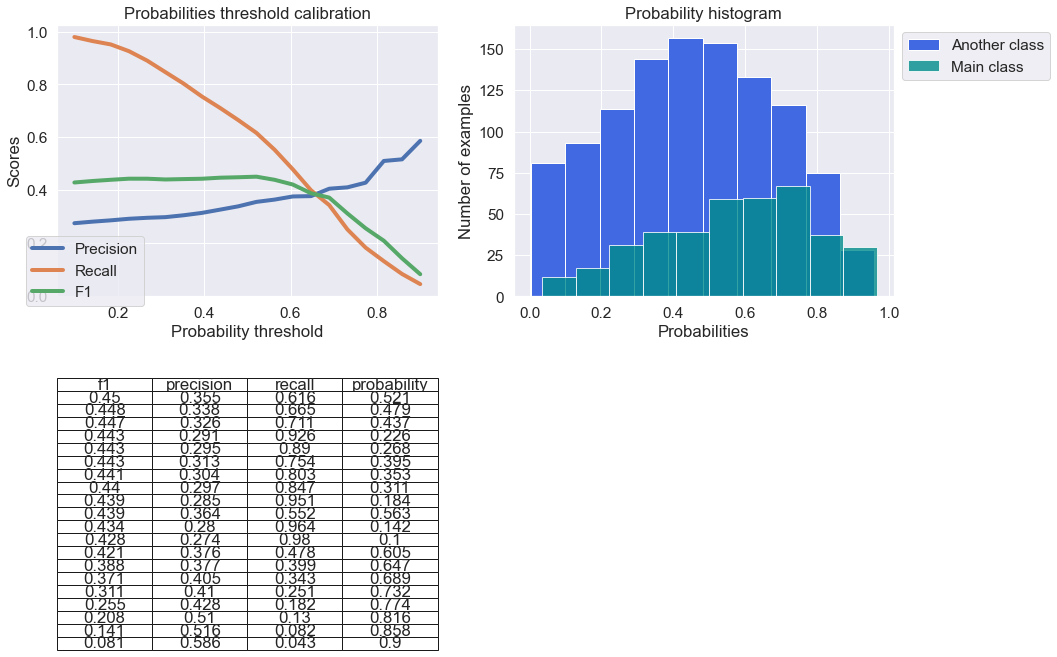

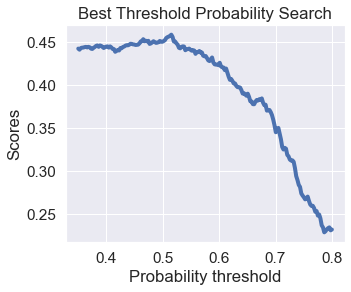

best threshold probability = 0.5150753768844221
0.4501779359430605
0.4584103512014787
----------------------------------------------------------------------
f1 on valid set = 0.4501779359430605
f1 on valid set after calibrating = 0.4584103512014787
[[652 443]
 [143 248]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69      1095
           1       0.36      0.63      0.46       391

    accuracy                           0.61      1486
   macro avg       0.59      0.61      0.57      1486
weighted avg       0.70      0.61      0.63      1486



In [236]:
# 3.11.2. GridSearch
print(f'CAT-BOOST')
print(70*'-')
param_grid = parse_params(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_ros[cont_cols + cat_features_CATB_4], y_train_ros)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

# 3.11.3. Test  
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_ros[cont_cols + cat_features_CATB_4], y_train_ros)
predict = pipe2.predict(X_test[cont_cols + cat_features_CATB_4])
predict_train = pipe2.predict(X_train_ros[cont_cols + cat_features_CATB_4])

# 3.11.4.калитбровка
predict_probas = pipe2.predict_proba(X_test[cont_cols + cat_features_CATB_4])
show_proba_calibration_plots(predict_probas, y_test, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_test, predict_probas, 0.35, 0.8, 200, score='f1', show_chart=True)
print(f1_score(y_test, predict))
print(f1_score(y_test, predict2))

# 3.11.5. результаты
print(70*'-')
print(f'f1 on valid set = {f1_score(y_test, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_test, predict2)}')
print(confusion_matrix(y_test, predict2))
print(classification_report(y_test, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_test, predict2), f1_score(y_test, predict2), best_params, threshold_prob)

In [4994]:
cont_cols + cat_features_CATB_2
dummy_cols_2

['Term_Long Term',
 'Term_Short Term',
 'Purpose ver.2_debt consolidation',
 'Purpose ver.2_educational expenses',
 'Purpose ver.2_medical bills',
 'Purpose ver.2_other',
 'Home Ownership ver.2_Home Mortgage',
 'Home Ownership ver.2_Own Home']